# Final Project Submission

Please fill out:
* Student name: Joe Webb
* Student pace: part time 
* Scheduled project review date/time: January 28th at 10:15am
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
#Using the OSEMiN Data Science Process, 1 - 2 paragraphs are enclosed that explain my approach to this project 
#through the OSEMN framework.

#1. 'Obtain': The requirement of this project is to predict the sale price of housing.  This data will be used to 
# advise investors or banks on how much should be approved for a home loan.  We will suggest investing 80% of the 
# Predicted Sale Price (.8 x yhat).  Our model will tell us the percentage of data that would be above that 
#threshold and we will consider those values as a "GOOD" Investment.

#Data has been gathered on the Selling Price ('Price') of homes between May 1, 2014 and May 30, 2015.  19 
#predictor variables are provided in 'kc_house_data.csv'.  The predictor varables will be analyzed to determine 
#if they should be included in a multivariable regression model to predict the Sale price of a house in the 
#future.  This data will be used to advise investors (or banks) on how much can be conservatively invest in the 
#purchase of a house. We will analyze outliers (Sale Price > $1.6 million) and determine if they affect the 
#accuracy of our final model.  

#2. 'Scrub' the data on missing values and outliers.  Decide how to replace or eliminate them.

#3. 'Explore':  Create visualizations to really get a feel for your dataset. understanding the distribution of 
# different columns and checking for multicollinearity. Check that the dataset meets the assumptions necessary 
#for a regression task. (normal distribution, linearity, skewness/kurtosis)

#4. 'Model':  develop a model that best predicts a response variable and evaluate.

#5. 'Interpret' the results given by the model 

In [ ]:
#3 MEANINGFUL QUESTIONS asked and answered in this project.  

################################################################################################################
#1.  ARE THERE OUTLIERS?  How are they identified?  How are they dealt with?......Yes, there are outliers, so I'm 
#going to use boxplots to visualize them. (sns.boxplot(x=kc_house2['price'])).  Outliers are to the right of the 
#'whisker' line.  Outliers are also identified using IQR.  Much of my research stated that outliers are identified
#using IQR = 1.5  However, one source used IQR = 3.  IQR = (75% percentile) - IQR * (75% percentile - 25% 
#percentile).......the boxplot visualizes if there are outliers outside the range of the 'whisker' line.  After 
#viewing the boxplot, I'll check the variance of data by viewing the number of points > than a chosen value picked
#off of the boxplot.

#Initially, I did not drop outliers.  But after completing an initial model, I decided to circle back and analyze
#removing outliers to improve the predictability of the model.

#I considered removing outliers for 'bathrooms','bedrooms','sqft_living' and grade' using IQR=3.  Thresholds
# are listed below.  If so,, then my presentation will include the note that our model is only "meant to predict 
#Sale price for houses with less than 5 bathrooms, 8 bedrooms, and less than 5900 sq ft."  Although, these 
#outliers did not have an impact on the model's Rsquared, they showed that the data was highly skewed and this 
#was visualized in the QQ Plots.  To improve the QQ PLOT of residuals, this model will remove outliers of 
#predictors that are used in the final model.

#Also, the question is whether to remove the outliers for the DEPENDENT VARIABLE. I had to decide whether to  
#remove the DV outliers > 1614000.  

#As I iterate through the modeling process to determine which predictors are most important, it should be noted
#that the model did NOT include Waterfront when I removed the 'price' outliers and the model's Rsquared was .61. 
#When 'price' outliers were included, then 'waterfront' became moRe important than 'view' in terms of Rsquared 
#(.62) It also should be noted that is NO outliers had been removed, then the final model Rsquared would have been
#.65.  In spite of a lower Rsquared, I chose to remove the outliers for the reasons below.

#THIS IS AN IMPORTANT NOTE: I'm choosing to remove 'price','grade' and 'sqft_living' outliers to ensure that their residuals are 
#normal. This will improve the quality of the model in predicting 'price'.

#RMSE was improved from $203,500 to $161,500.  Model predicted "GOOD INVESTMENTS" at 79% to 81%.  

#kc_house2[kc_house2['price']>1614000]
#kc_house2[kc_house2['grade']>11]  #102 rows
#kc_house2[kc_house2['bathrooms']>4.75]  #64 rows
#kc_house2[kc_house2['bedrooms']>7]#  23 rows
#kc_house2[kc_house2['sqft_living']>5910]#  74 rows
#kc_house2[kc_house2['view']>0].shape#2112 rows
#kc_house2[kc_house2['sqft_living15']>4970].shape#23 rows
#Kc_house2[(kc_house2['price']>1614000) | (kc_house2['grade']>11) | (kc_house2['sqft_living']>5900)] #472 rows

################################################################################################################
#2.  HOW DOES YEAR BUILT AFFECT THE PREDICTED PRICE?  My final model includes "yr_built".  It's coefficient is 
#negative, which indicates that the predicted sale 'price' decreases with that are newer (higher calendar years).
#This is counter intuitive, so I'll hope to answer the question.

#I grouped the homes by year and calculated their mean.  A visualization will show that homes built ~1960 homes 
#reached an average (mean) low.  Years before and years after this time frame were higher. It hypothesized that 
#homes >60 years old below a mean value are torn down and replaced.  This would tend to raise the overall mean 
#value for older homes as lower value, older homes are replaced with newer homes.

#################################################################################################################
#3.  DO WATERFRONT HOMES HAVE A HIGHER SALE 'PRICE', if other predictors are held constant?  I'll compare 
#waterfront homes to non-waterfront homes.  3,441 data points were used with Grade, Yr_built, and sqft_living data 
#near their central points.  The data points will be central points where Grade is 7 or 8, Year Built between 1951
#& 1997, and Sqft Living between 1430 and 2550.  

#These are the central values of these model predictors.  With them relatively constant, then the difference in 
#price will be most determined by the 'waterfront' value. 

In [2]:
#* **id** - unique identified for a house
#* **date** - Date house was sold
#* **price** -  is prediction target of Sale Price
#* **bedrooms** -  Number of Bedrooms/House
#* **bathrooms** - Number of bathrooms/bedrooms
#* **sqft_living** -  square footage of the home
#* **sqft_lot** -  square footage of the lot
#* **floors** -  Total floors (levels) in house
#* **waterfront** - House which has a view to a waterfront
#* **viewed** - Has been viewed by prospective buyers
#* **condition** - How good the condition is ( Overall )
#* **grade** - overall grade given to the housing unit, based on King County grading system
#* **sqft_above** - square footage of house apart from basement
#* **sqft_basement** - square footage of the basement
#* **yr_built** - Year Built 
#* **yr_renovated** - Year when house was renovated
#* **zipcode** - zipcode 
#* **lat** - Latitude coordinate
#* **long** - Longitude coordinate
#* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
#* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
#*  **Age** 2015 - year built

In [3]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [4]:
kc_house=pd.read_csv('kc_house_data.csv')
kc_house['age']=2015-kc_house.yr_built
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [5]:
#SCRUB data by becoming familiar with the Dataset
#The first step in our Exploratory Data Analysis will be to get familiar with the data. This step includes:

#Understanding the dimensionality of your dataset
#Investigating what type of data it contains, and the data types used to store it
#Discovering how missing values are encoded, and how many there are.
#Getting a feel for what information it does and doesnt contain
#In the cell below, get the descriptive statistics of each DataFrame.
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,44.000324
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


In [6]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [7]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
age              21597 non-null int64
dtypes: float64(8), int64(12), object

In [8]:
#All predictors have 21597 values except 'waterfront','view', and 'yr_renovated'.  Next step is to evaluate the 
#values in these 3 predictors

In [9]:
print(kc_house.view.value_counts().head())
print(kc_house.waterfront.value_counts().head())
kc_house.yr_renovated.value_counts().head()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    19075
1.0      146
Name: waterfront, dtype: int64


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [10]:
kc_house.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [11]:
kc_house.waterfront.unique()

array([nan,  0.,  1.])

In [12]:
kc_house.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [13]:
#View has 19422 values of "0".  It cannot be determined if this is 'no' or if this is a placeholder, but we will
#keep 'view' for now.

#Waterfront data will be kept because the value indicates if it is waterfront or not.  

#I mistakenly dropped 'yr_renovated' is my first model because .value_counts showed only 1% of values.  After
#looking at the model exhaustively, I looked at the .unique() values and was surprised.  So, I'll reevaluate 
#yr_renovated.

In [14]:
#'date' and 'sqft_basement' are objects, so need to convert.

In [15]:
kc_house['date']=pd.to_datetime(kc_house['date'])
kc_house['sqft_basement']=kc_house['sqft_basement'].convert_objects(convert_numeric=True)#It was very important
#to convert 'sqft_basement' to a float, because the null values didn't appear when they were 'objects'

kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
age              21597 non-null int64
dtypes: datetime64[ns](1), f

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [16]:
kc_house.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [17]:
#Categorical Predictors:  floors (1 to 3.5), waterfront (0 or 1), condition (1 to 5), view (0 to 4), grade (3 to 
#7), bedrooms (1 to 33), zipcode (98001 to 98199), yr_built (1900 to 2015).  I researched if any of the 
#categories needed dummy variables.  All of the categories have their inherent'category codes', except waterfront.
#Waterfront has 2 categories.  So, I chose not to assign category dummy variables.

#Continuous predictors:  id, Price, sqft_living, sqft_lot, lat, long, sqft_living15, sqft_lot15

In [18]:
kc_house.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
age                 0
dtype: int64

In [19]:
#Waterfront has 2376 (11%), view has 63 (.2%), sqft_basement has 454 (2%) null values.  Let's investigate the 
#null values.

In [20]:
kc_house.waterfront.unique(), kc_house.view.unique()

(array([nan,  0.,  1.]), array([ 0., nan,  3.,  4.,  2.,  1.]))

In [21]:
kc_house.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [22]:
#An outlier was discovered in the EXPLORATION phase of the project, so I came back and and dropping the row.  It's
# an outlier with 1.75 bathrooms & 33 bedrooms, so it's assumed to be a data entry error.
kc_house = kc_house.drop([15856], axis=0)

In [23]:
#Separating the data into 3 different dataframes based on the 'waterfront' value.  This is to determine how to 
#deal with null values.
kc_water_zero=kc_house[kc_house['waterfront']==0]

kc_water_one=kc_house[kc_house['waterfront']==1]

kc_water_nan=kc_house[kc_house['waterfront']!=0]
kc_water_nan2=kc_water_nan[kc_water_nan['waterfront']!=1]
kc_water_zero.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,1.907400e+04,1.907400e+04,19074.000000,19074.000000,19074.000000,1.907400e+04,19074.000000,19074.0,19018.000000,19074.000000,...,19074.000000,18661.000000,19074.000000,15687.000000,19074.000000,19074.000000,19074.000000,19074.000000,19074.000000,19074.000000
mean,4.593467e+09,5.326364e+05,3.373283,2.112562,2073.548181,1.499159e+04,1.494023,0.0,0.203965,3.408881,...,1785.914229,287.658539,1971.108105,79.285141,98077.589808,47.560072,-122.213546,1982.087134,12729.907151,43.891895
std,2.877221e+09,3.449673e+05,0.902010,0.764553,909.101646,4.077801e+04,0.539982,0.0,0.698402,0.649346,...,824.969858,436.999915,29.392182,389.893315,53.374809,0.138858,0.140741,680.983975,27594.215147,29.392182
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036250e+03,1.000000,0.0,0.000000,3.000000,...,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000,18.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000,40.000000
75%,7.334401e+09,6.385000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,...,2210.000000,550.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.750000,63.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,...,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


In [24]:
kc_water_one.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,...,146.000000,142.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,...,2508.760274,748.978873,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630,52.719178
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,...,1283.720489,809.891968,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993,27.118576
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,...,440.000000,0.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000,1.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,...,1565.000000,0.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000,30.250000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,...,2200.000000,580.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000,55.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,...,3220.000000,1270.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000,73.750000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,...,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000,110.000000


In [25]:
kc_water_nan2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.376000e+03,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2370.000000,2376.000000,...,2376.000000,2339.000000,2376.000000,1946.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.256540,3.408670,...,1766.194865,297.430526,1970.675084,94.323227,98079.694865,47.561465,-122.213497,1980.507576,12366.675084,44.324916
std,2.873451e+09,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783974,0.652826,...,794.747951,440.459181,29.302970,423.549734,53.949839,0.137431,0.140720,689.428551,24694.192000,29.302970
min,1.000102e+06,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,...,430.000000,0.000000,1900.000000,0.000000,98001.000000,47.180800,-122.503000,780.000000,788.000000,0.000000
25%,2.112250e+09,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.750000,47.472925,-122.327000,1470.000000,5108.000000,19.000000
50%,3.789200e+09,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,...,1550.000000,0.000000,1973.000000,0.000000,98070.000000,47.571400,-122.228000,1820.000000,7624.500000,42.000000
75%,7.227501e+09,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,...,2190.000000,600.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125750,2370.000000,10001.250000,64.000000
max,9.839301e+09,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,...,6660.000000,2160.000000,2015.000000,2015.000000,98199.000000,47.777400,-121.319000,4940.000000,311610.000000,115.000000


In [26]:
#WATERFRONT NAN VALUES:  The dataframe was split into 3 subsets ('0','1','nan') based on the 'waterfront' value.  
#The 5-point statistics of the 'nan'subset is extremely similar to the '0' subset.  Each statistic (except max) 
#is within 1.7%.  Whereas, 5-point stastic values in the waterfront '1' subset are atleast 2.6 times larger than 
#the 'nan' subset.

#Intuitively, this makes sense.  If a property is on the waterfront, then it would be positively recorded as such 
# with a '1' value.  However, a property not on the waterfront would be assigned a '0' or not assigned a value.
# This is confirmed by the similarity of the "0" waterfront subset to the 'nan' subset.

#Therefore, my model will re-assign 'nan' values with '0' in the waterfront column.

In [27]:
#'SQFT_BASEMENT' NAN VALUES.  The choice is to drop 2% of the sqft_basement values that are nan.  Or replace those 
#value with the mean (297.4) or median (0).  I'm going to fillna with the median ('0')

#'YR_RENOVATED' NAN VALUES.  The choice is to drop 3843 (18%) of the yr_renovated values that are nan.  Or replace 
#those value with the mean (83 or median (0).  I'm going to fillna with the median ('0')

#'VIEW' NAN VALUES:  I'm going to fillna with the median ('0'), instead of the mean (.23).  90% of the 
#view values are '0'.  

In [28]:
kc_house.waterfront.fillna(0, inplace=True)
kc_house.sqft_basement.fillna(0, inplace=True)
kc_house.view.fillna(0, inplace=True)
kc_house.yr_renovated.fillna(0, inplace=True)
kc_house.waterfront.unique()

array([0., 1.])

In [29]:
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [30]:
kc_house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age              0
dtype: int64

In [31]:
################################################################################################################

In [32]:
#3. EXPLORE:  Create visualizations to really get a feel for your dataset. Check for outliers.  Understand the 
#distribution of different columns and checking for multicollinearity. Check that the dataset meets the 
#assumptions necessary for a regression task. (normal distribution, linearity, heteroscedasticity)

#ARE THERE OUTLIERS?  How are they identified?  How are they dealt with?......Yes, there are outliers, so I'm 
#going to use boxplots to visualize them. (sns.boxplot(x=kc_house2['price'])).  Outliers are to the right of the 
#'whisker' line.  Outliers are also identified using IQR.  Much of my research stated that outliers are identified
#using IQR = 1.5  However, one source used IQR = 3.  IQR = (75% percentile) - IQR * (75% percentile - 25% 
#percentile).......#the boxplot visualizes if there are outliers outside the range of the 'whisker' line.  

#Initially, I did not drop outliers.  But after completing an initial model, I decided to circle back and analyze
#removing outliers to improve the effectiveness (Rsquared) of the model and the normality of the residuals.

#I considered removing outliers for'bathrooms','bedrooms','sqft_living' (but not 'grade) using IQR=3.  Thresholds
#are listed below.  Outliers did not significantly change Rsquared.  However, I'm going to remove outliers to 
#improve the normality (distribution) of the residuals.  My presentation includes the note that our model is only 
#meant to predict Sale price for houses less than $1,614,000, grade <12, and less than 5900 sq ft."  HOWEVER, 
#THESE OUTLIERS HAD NO IMPACT ON THE MODEL"S RSQUARED!!  

#kc_house2[kc_house3['price']>1614000]
#kc_house2[kc_house2['grade']>11]  #102 rows
#kc_house2[kc_house2['bathrooms']>4.75]  #64 rows
#kc_house2[kc_house2['bedrooms']>7]#  23 rows
#kc_house2[kc_house2['sqft_living']>5910]#  74 rows
#kc_house3=kc_house2[kc_house3['price']>1614000]

################################################################################################################
#NORMAL DISTRIBUTION:  The continuous predictor values, visualized in the histogram below, have properties of 
# normal distribution.  There is strong evidence of skewness to the right and kurtosis.  KURTOSIS is evident is 
#the QQ Plots (visualized below) of all predictors.  Also, the RESIDUALS plot line (visualized below) is 
#horizontal centered on zero for all predictors.

#Normality of the predictor data is NOT mandatory for regression if you don't want to do any hypothesis testing. 
#OLS works fine for non-normal data distributions in the context of prediction.  However, many sources insist that
#residuals MUST be normally distributed above and below a horizontal line centered on zero.  ALL predictors meet 
#this assumption.  Also, as a caveat, many sources state that non-normal data can be used as long as it stated in 
#the findings of the model.

#LOG TRANSFORMATION and SCALING: this should be considered for continuous (but not categorical) data.  Log 
#transformation is used to normalized data (visualization below) and scaling is used to equalize the predictor 
#coefficients.  My model transformed and scaled sqft_living with log transformed values prior to multilinear 
#regression. Sqft_basement cannot be log transformed because it's values are a majority of zeros.

#***NOTE I ran the model before and after transforming and scaling the continuous datedate.  The R-squared was not
#improved by transforming data.  It was the same. So,I'm commenting out the code below and proceeding without 
#transformating nor scaling.

#sqbase=(kc_house5['sqft_basement'])
#log_sqliv=np.log(kc_house5['sqft_living'])
#scaled_log_sqliv=(log_sqliv-min(log_sqliv))/(max(log_sqliv)-min(log_sqliv))
#scaled_sqbase=(sqbase-min(sqbase))/(max(sqbase)-min(sqbase))

#trans_df=kc_house5

#kc_trans6=trans_df
#kc_trans6['sqft_basement']=scaled_sqbase
#kc_trans6['sqft_living']=scaled_log_sqliv
#kc_trans6.head()

################################################################################################################
#ANOTHER QUESTION:  IS THERE MULTICOLLINEARITY IN PREDICTORS?  If so, how are they dealt with?  In my model, I'll 
#identify predictors that have a Correlation Coefficient > .8.  In this section, I've used a Correlation Matrix 

#Remove the multicollinear predictors from the data:  KEEP sqft_living and DROP 'sqft_above' because it correlated
#to it.

# DROP:'age' because it is negative correlated to 'Yr_built'

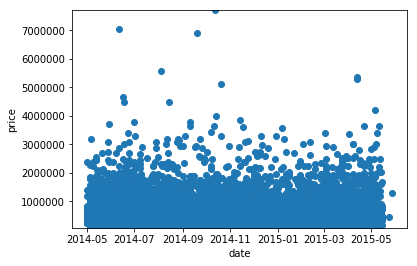

In [33]:
#I'll visualize scatter plots to check for linearity.

%matplotlib inline
plt.plot_date(x=kc_house['date'],y=kc_house['price'])
plt.xlabel('date')
plt.ylabel('price')
plt.ylim(78000,7700000)
plt.show()

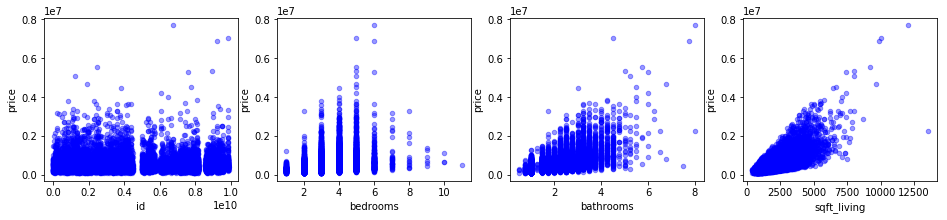

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'id', 'bedrooms','bathrooms','sqft_living'], axes):
    kc_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

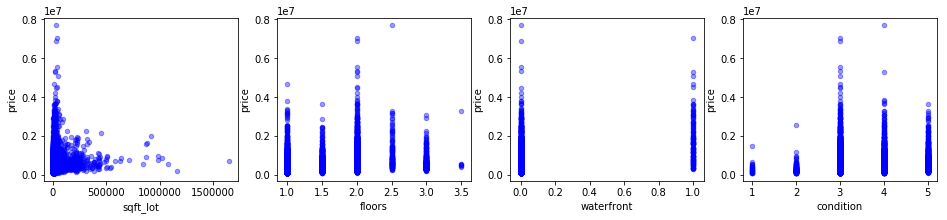

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'sqft_lot', 'floors','waterfront','condition'], axes):
    kc_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

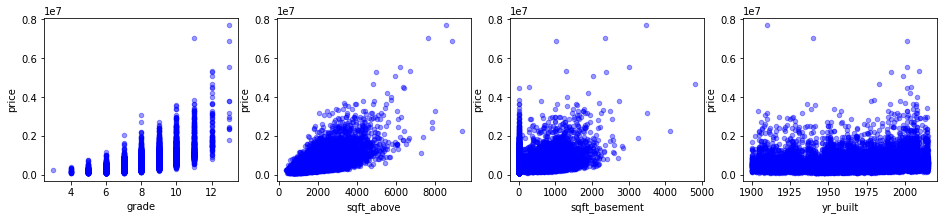

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'grade', 'sqft_above','sqft_basement','yr_built'], axes):
    kc_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

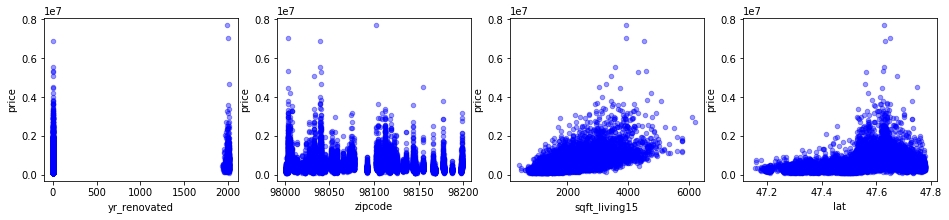

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_renovated','zipcode','sqft_living15','lat'], axes):
    kc_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

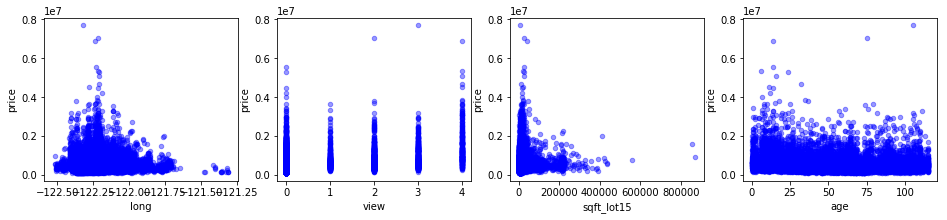

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['long','view','sqft_lot15','age'], axes):
    kc_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [39]:
#Here I'll use OLS to check for the Rsquared, slope, and p-value of each predictor.

col_names = kc_house.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
#    print ("Sale Price~" + val)
#    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_house).fit()
    X_new = pd.DataFrame({val: [kc_house[val].min(), kc_house[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#    print(results[idx+1])
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,id,0.000280984,550097,-2.14066e-06,0.0137631
2,bedrooms,0.0998311,107394,128387,0
3,bathrooms,0.276587,8692.16,251247,0
4,sqft_living,0.492704,-44011.5,280.869,0
5,sqft_lot,0.00807828,528253,0.797311,5.5613e-40
6,floors,0.0659568,279085,174824,0
7,waterfront,0.0698586,532281,1.18493e+06,0
8,view,0.154844,496207,189048,0
9,condition,0.00129821,470905,20349.6,1.18151e-07


In [40]:
#Observations:  
#Rsquared > 20%: variation in price is explained by:'sqft_living15','sqft_above','grade','sqft_living','bathrooms'

#No slope (indicates no relationship):  no slope in 'id'
#p-values (>.05) indicates there's a possibility that slope=0: 'zipcode','yr_renovated','yr_built'

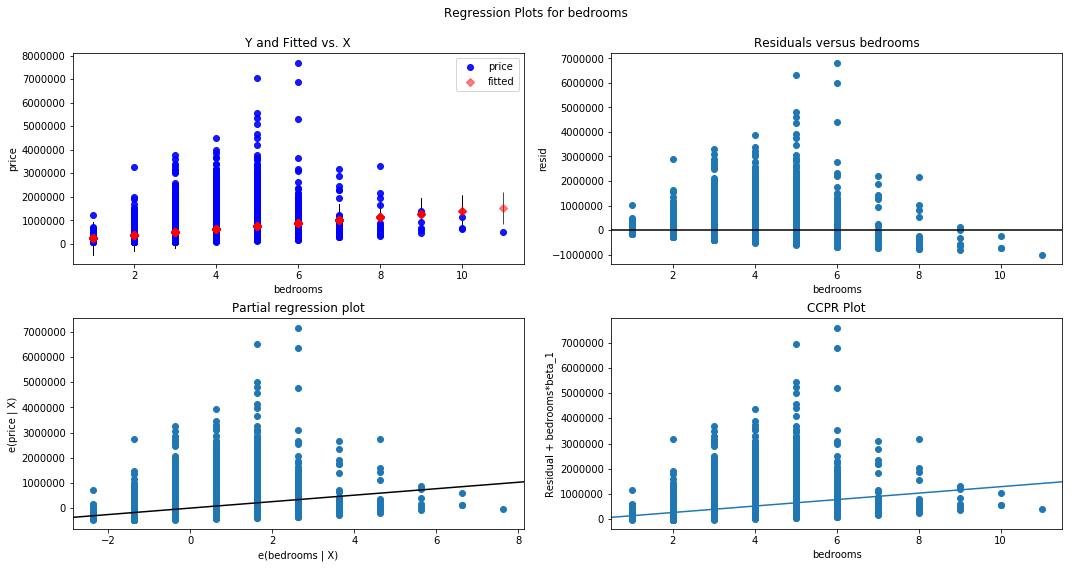

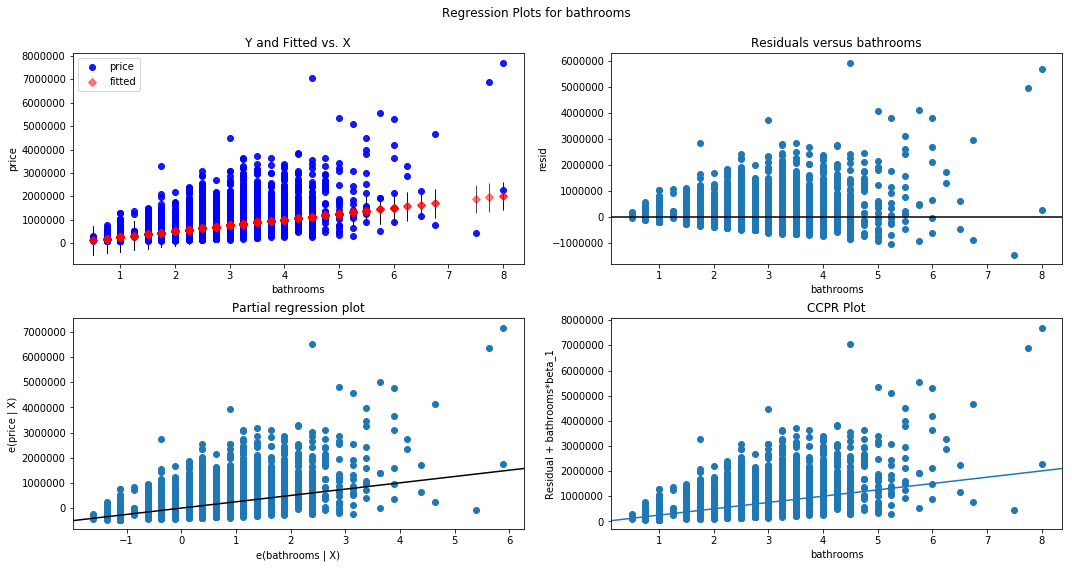

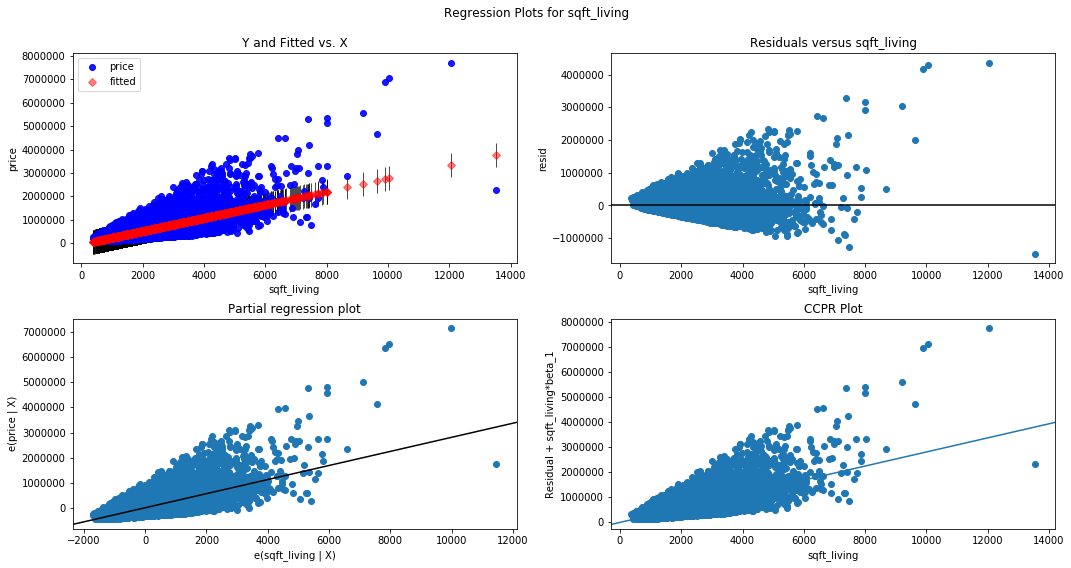

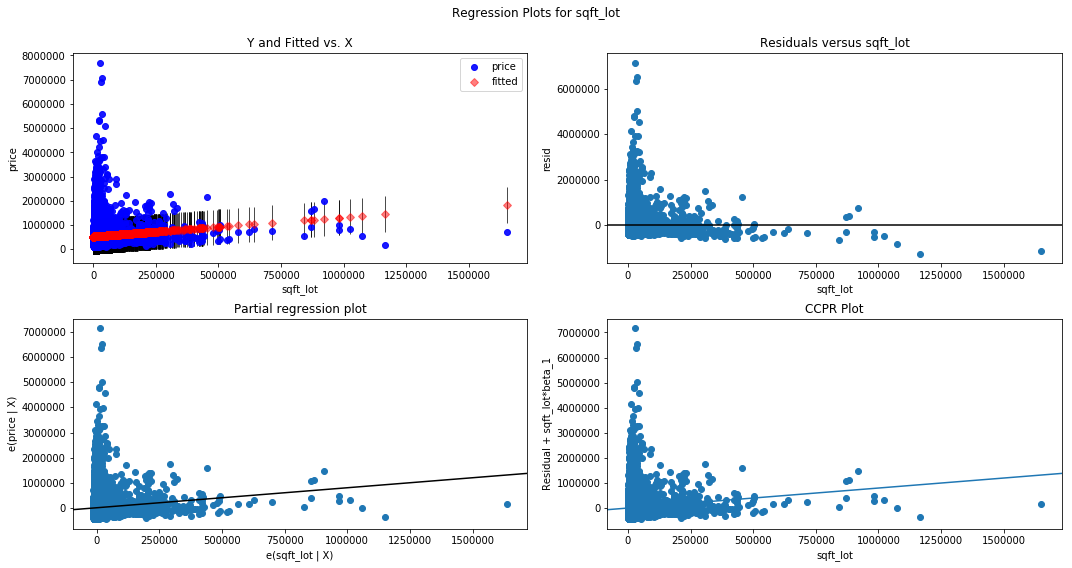

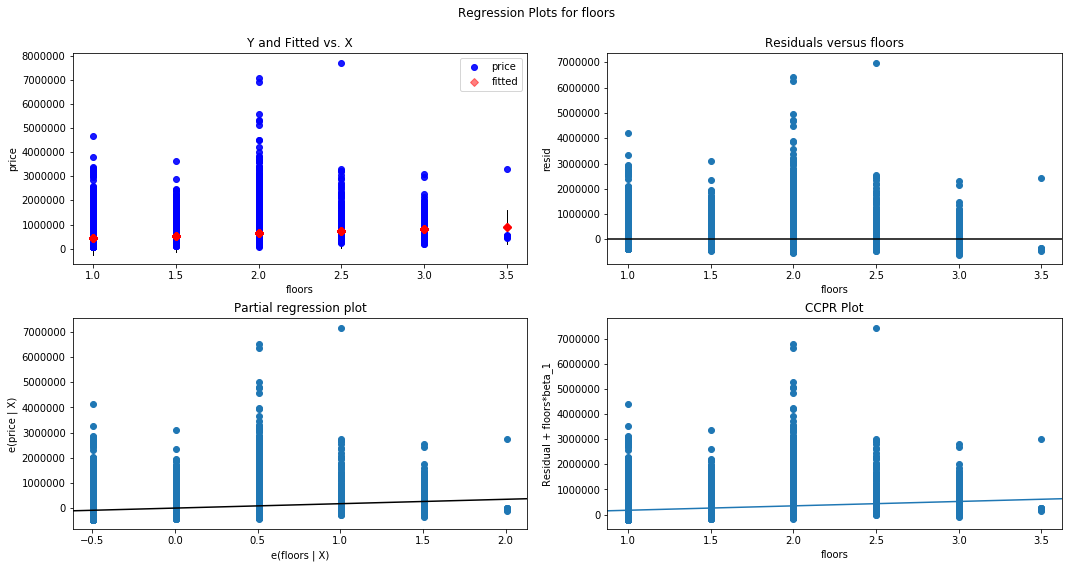

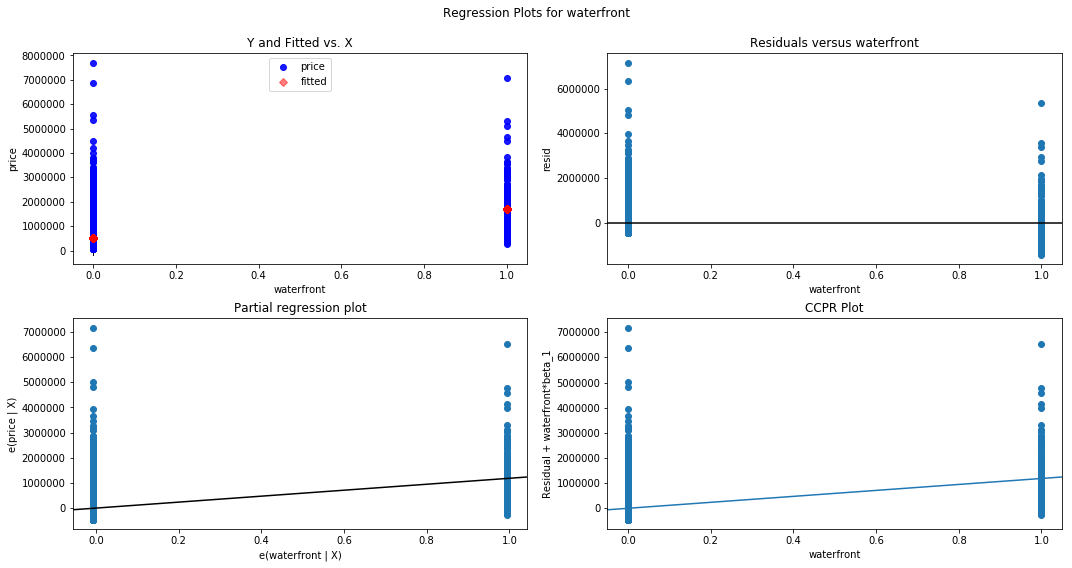

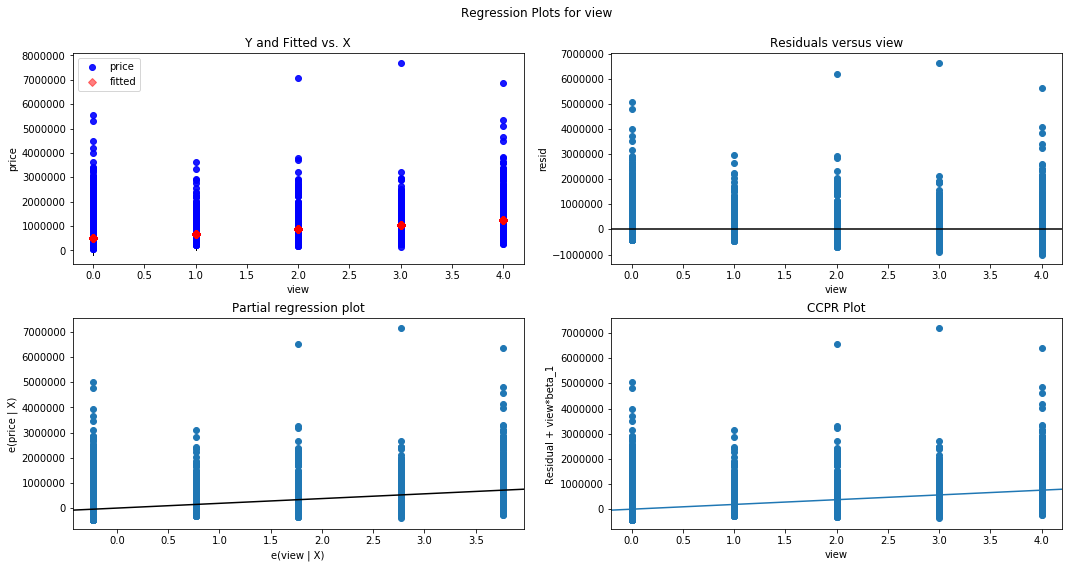

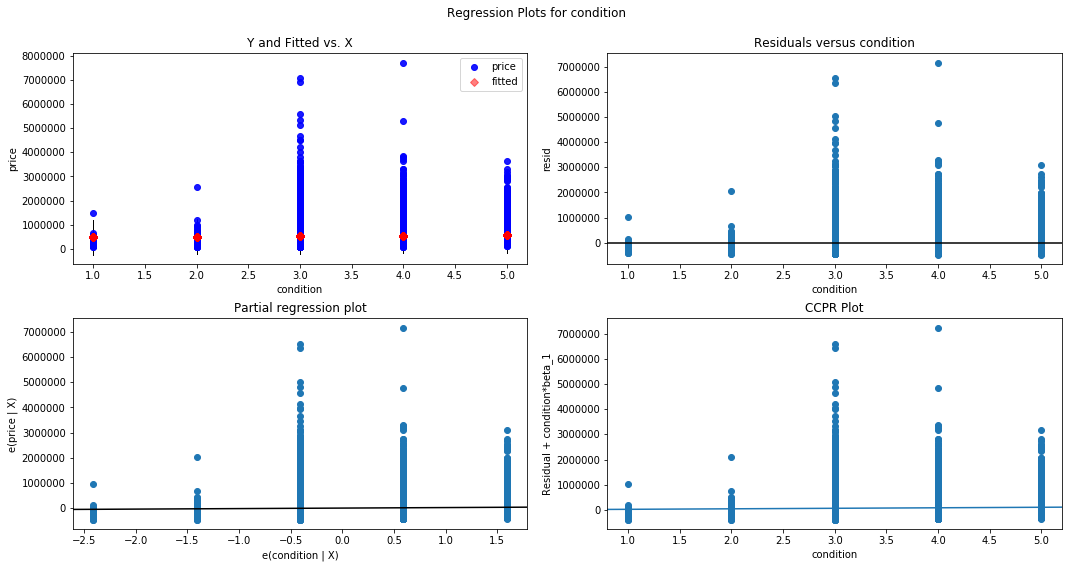

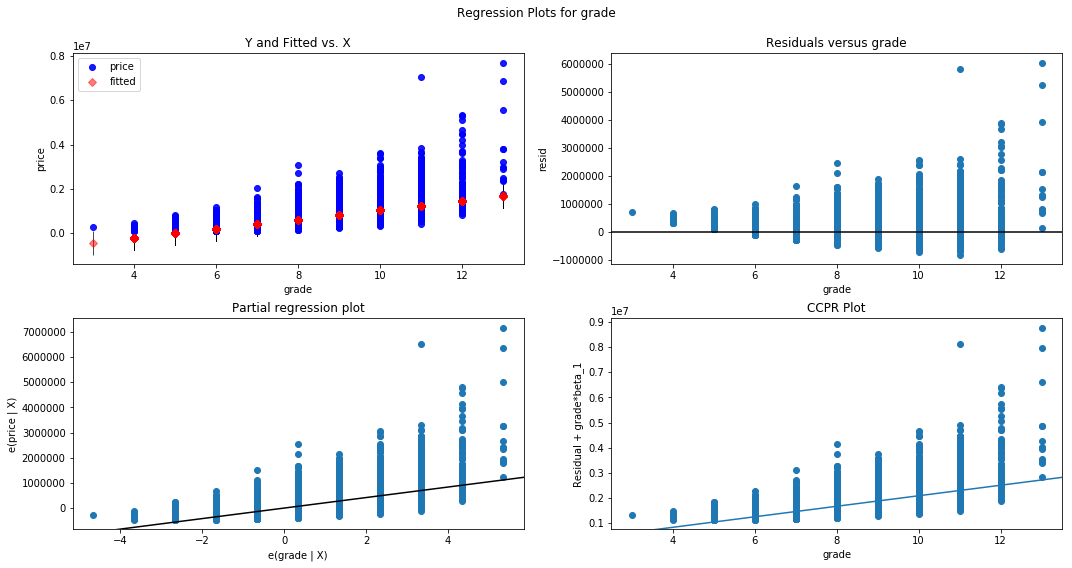

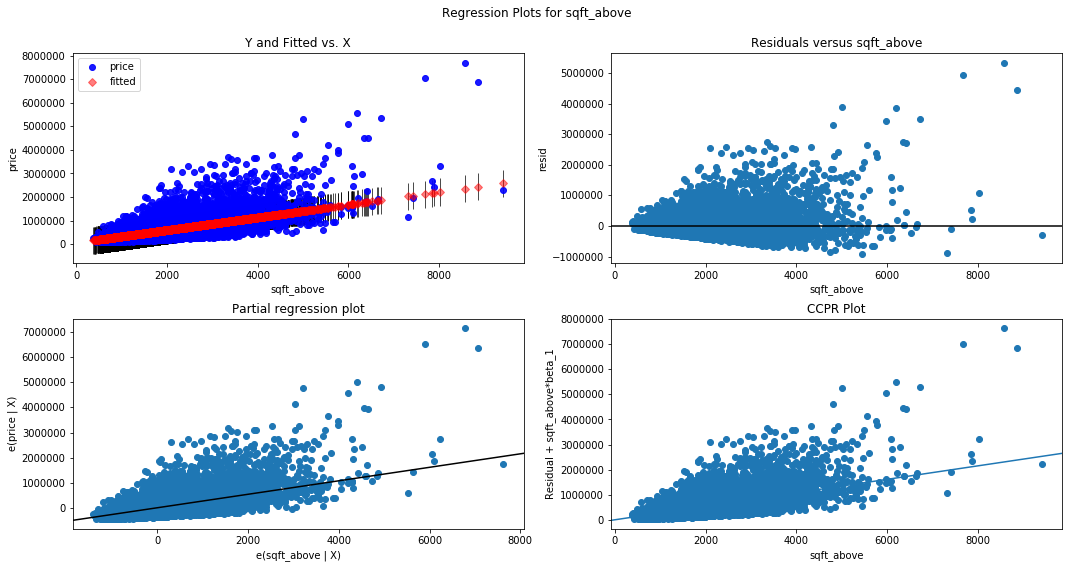

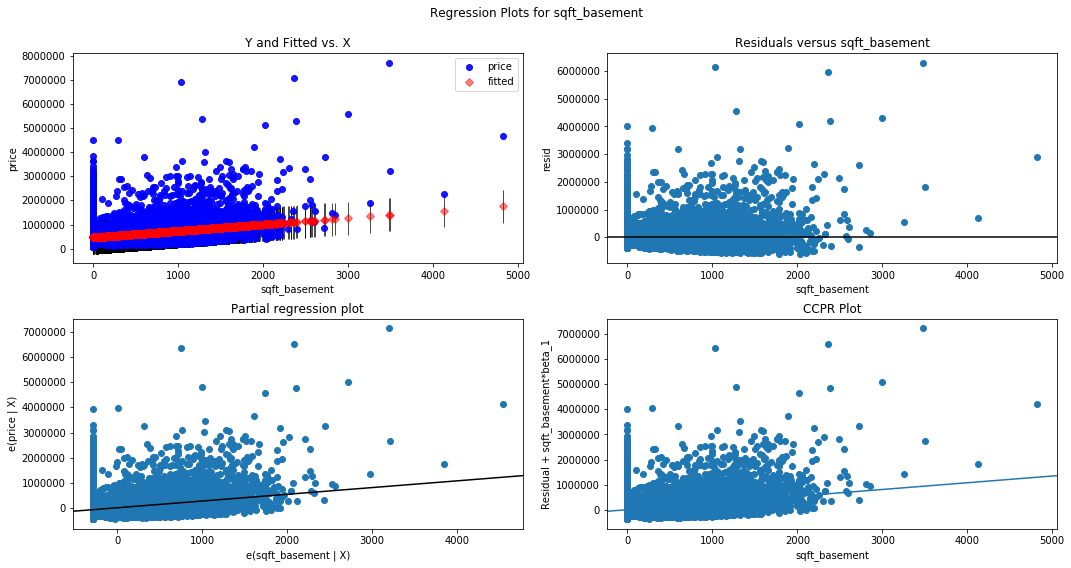

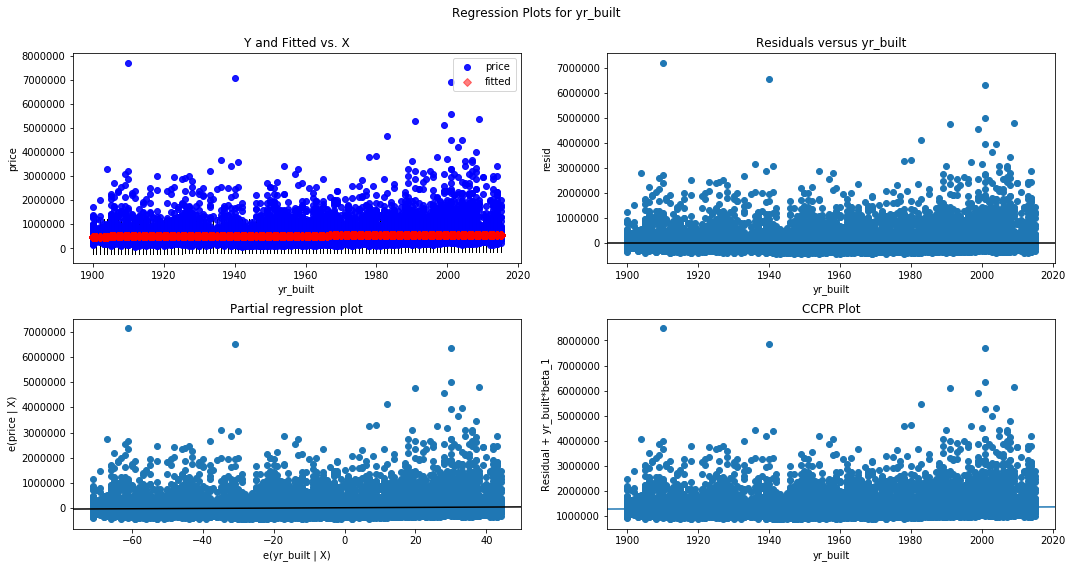

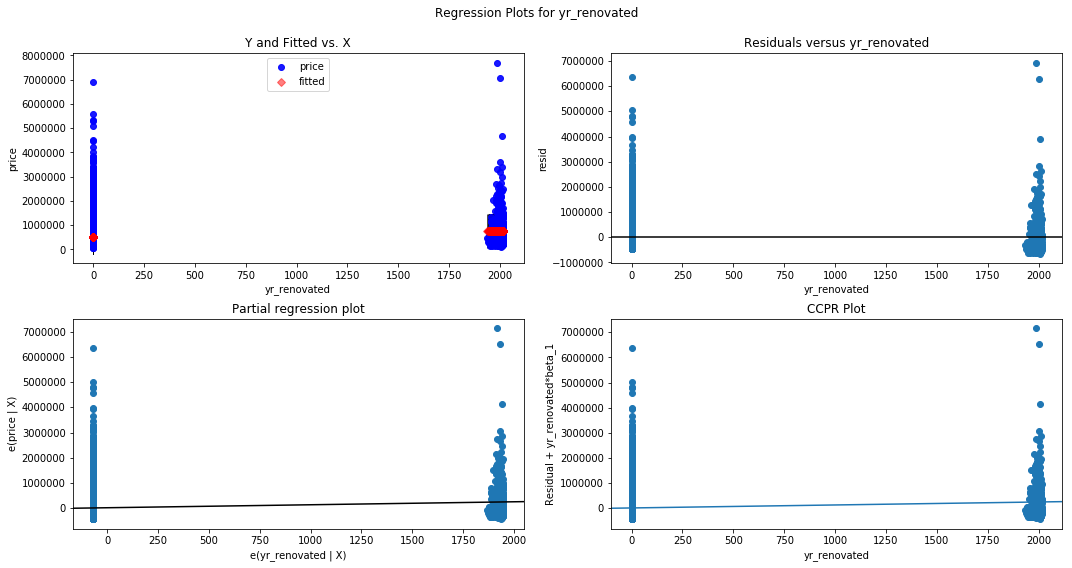

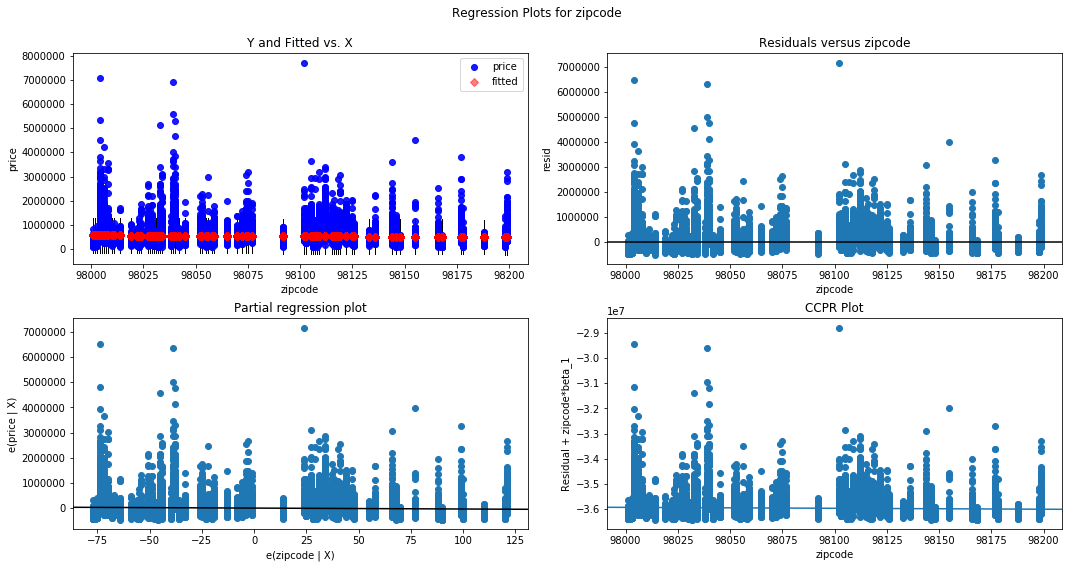

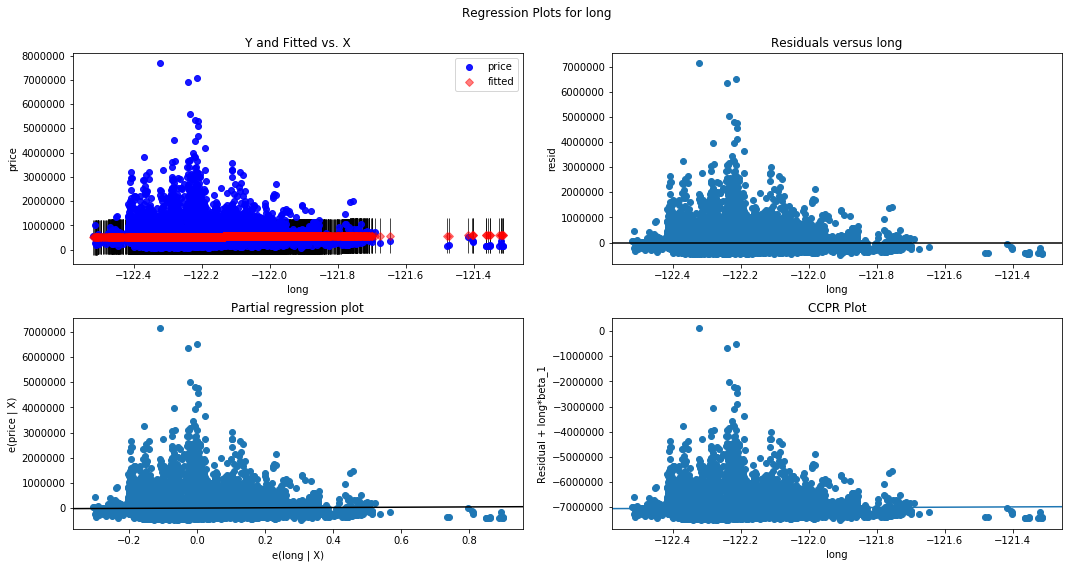

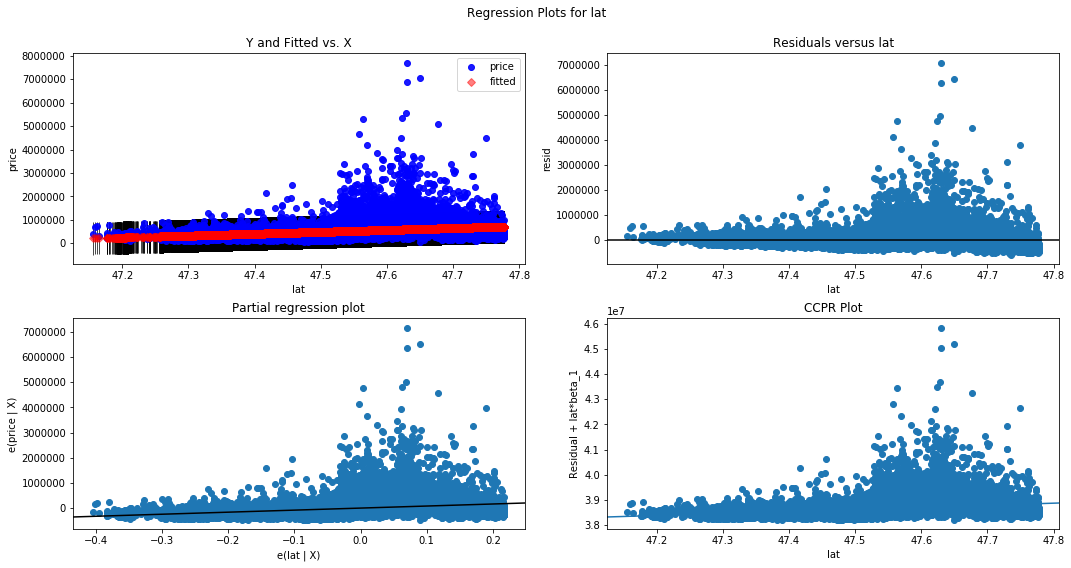

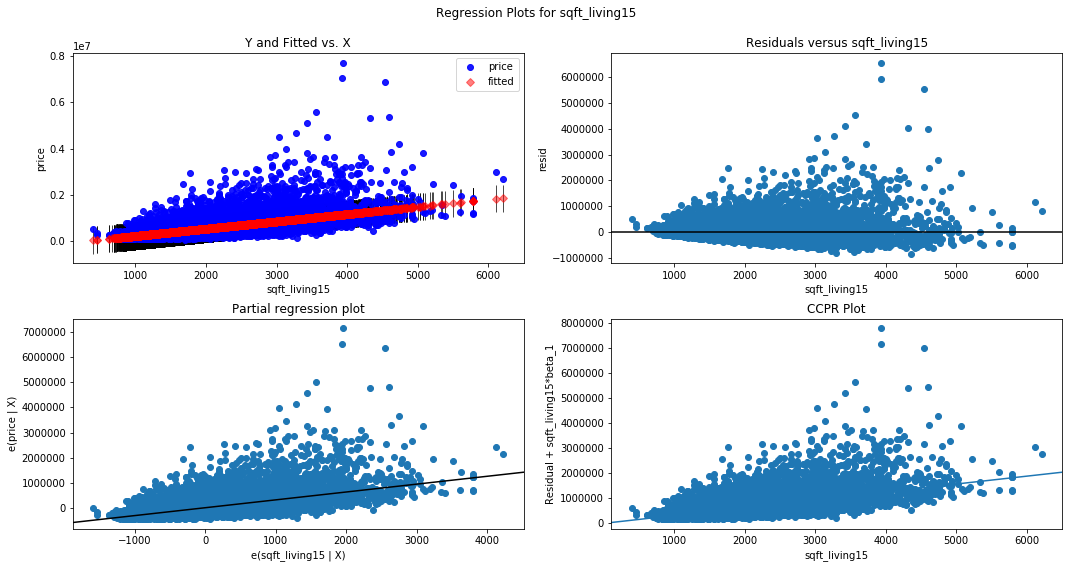

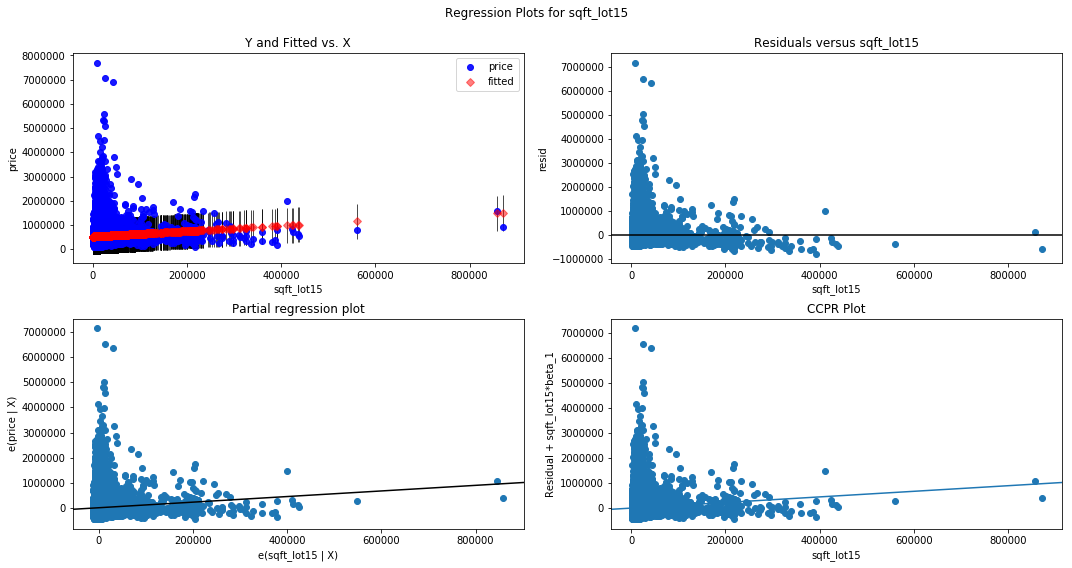

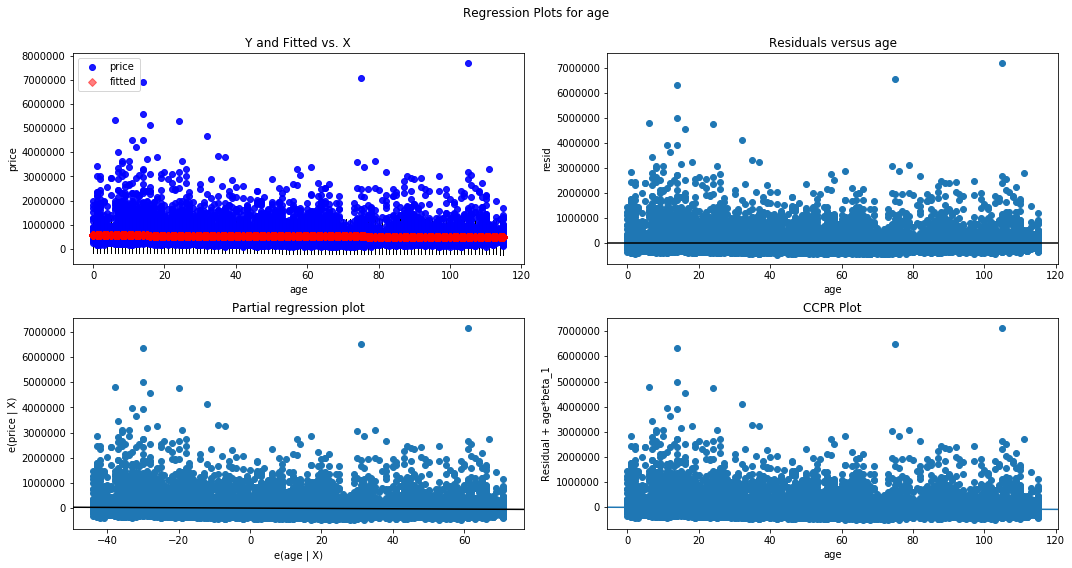

In [41]:
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode','long','lat',
       'sqft_living15', 'sqft_lot15','age']):
    f='price~'+val
    model=ols(formula=f,data=kc_house).fit()
    X_new=pd.DataFrame({val:[kc_house[val].min(),kc_house[val].max()]});
    Y_pred=model.predict(X_new)
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model,val,fig=fig)
    plt.show()

<Figure size 1080x576 with 0 Axes>

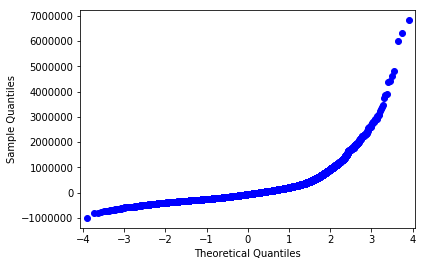

<Figure size 1080x576 with 0 Axes>

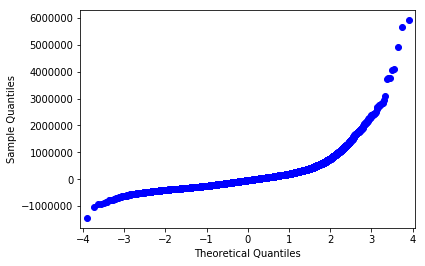

<Figure size 1080x576 with 0 Axes>

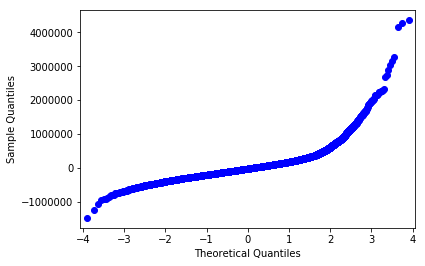

<Figure size 1080x576 with 0 Axes>

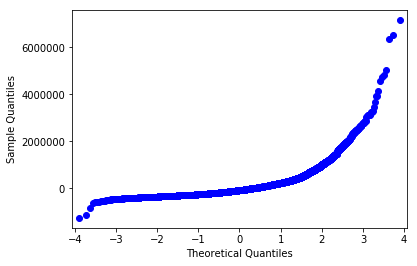

<Figure size 1080x576 with 0 Axes>

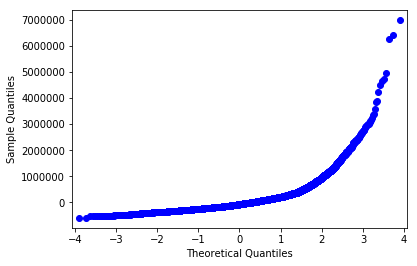

<Figure size 1080x576 with 0 Axes>

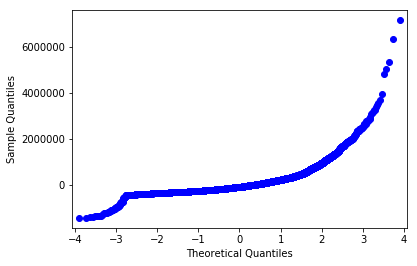

<Figure size 1080x576 with 0 Axes>

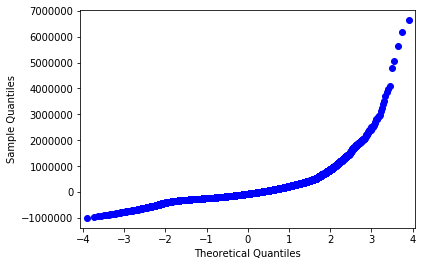

<Figure size 1080x576 with 0 Axes>

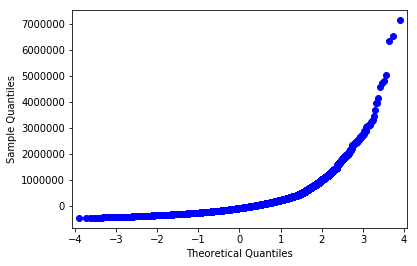

<Figure size 1080x576 with 0 Axes>

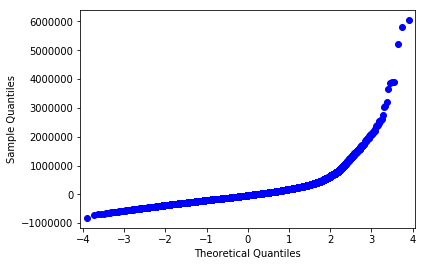

<Figure size 1080x576 with 0 Axes>

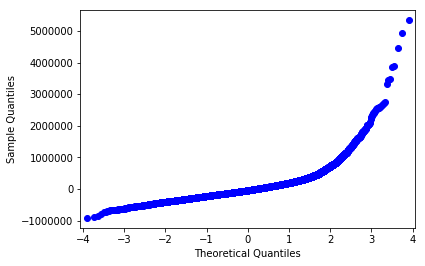

<Figure size 1080x576 with 0 Axes>

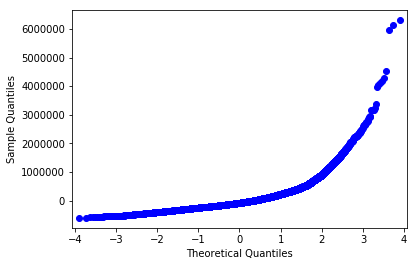

<Figure size 1080x576 with 0 Axes>

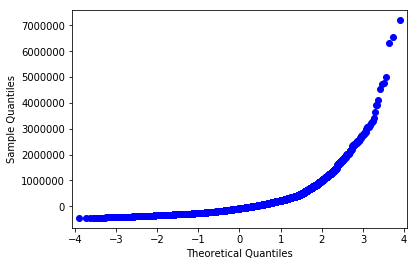

<Figure size 1080x576 with 0 Axes>

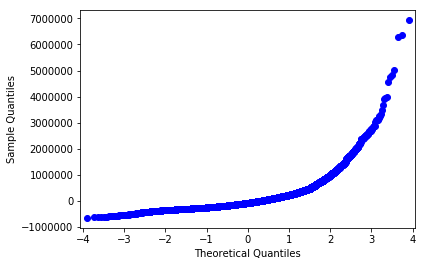

<Figure size 1080x576 with 0 Axes>

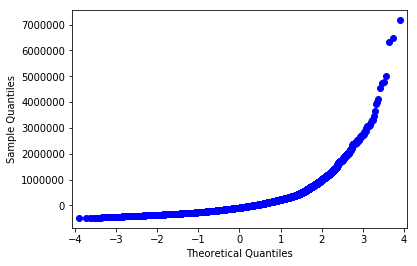

<Figure size 1080x576 with 0 Axes>

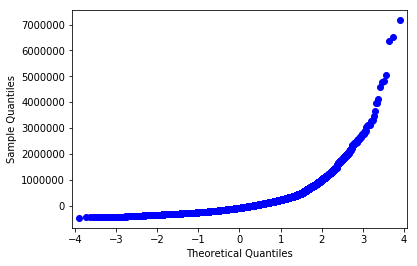

<Figure size 1080x576 with 0 Axes>

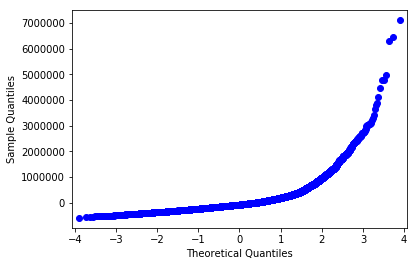

<Figure size 1080x576 with 0 Axes>

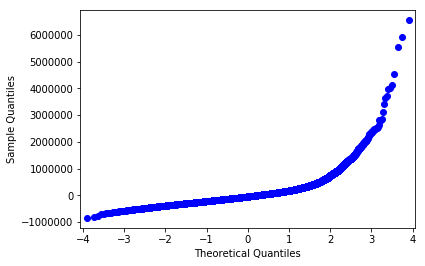

<Figure size 1080x576 with 0 Axes>

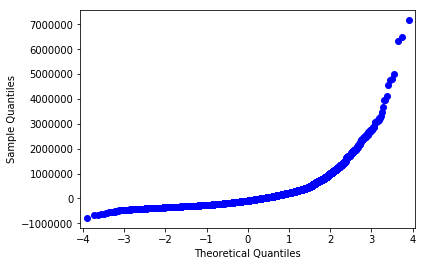

<Figure size 1080x576 with 0 Axes>

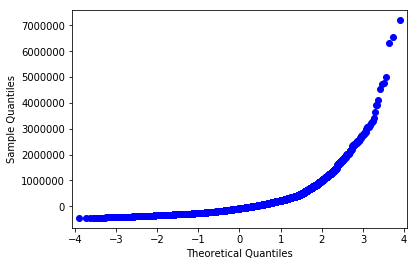

In [42]:
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode','long','lat',
       'sqft_living15', 'sqft_lot15','age']):
    f='price~'+val
    model=ols(formula=f,data=kc_house).fit()
    X_new=pd.DataFrame({val:[kc_house[val].min(),kc_house[val].max()]});
    Y_pred=model.predict(X_new)
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.qqplot(model.resid)
    plt.show()

In [43]:
#Notice the points form a curve instead of a straight line. These Q-Q plots indicate that the data is skewed. I'll
#remove outliers and run QQ plot again.  

In [44]:
################################################################################################################

In [44]:
################################################################################################################

In [45]:
#The visualizations and slope calculations show that there is no relationship between price and 'condition', '
#zipcode', 'long','lat'. 'date' and 'id' also have no relevancy to the 'price'.  These columns will be dropped.  

kc_house2=kc_house.drop(['id','date','condition','zipcode','long','lat','yr_renovated'],axis=1)#################

In [46]:
kc_house2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [47]:
#there are outliers, so I'm going to use boxplots to visualize them.  Outliers are to the right of the 'whisker'
# line.  Outliers are also identified using IQR=3.

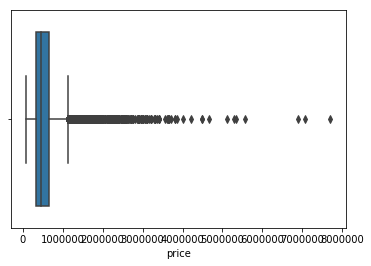

In [48]:
import seaborn as sns
sns.boxplot(x=kc_house2['price'])
#sns.boxplot(x=kc_house2['bedrooms'])
#sns.boxplot(x=kc_house2['sqft_living'])
#sns.boxplot(x=kc_house2['sqft_lot'])
#sns.boxplot(x=kc_house2['sqft_above'])
#sns.boxplot(x=kc_house2['sqft_basement'])
#sns.boxplot(x=kc_house2['long'])
#sns.boxplot(x=kc_house2['sqft_living15'])
#sns.boxplot(x=kc_house2['sqft_lot15'])

In [49]:
kc_house2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,7.657946,1788.631506,285.702954,1971.000787,1986.650722,12758.656649,43.999213
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,1.173218,827.763251,439.825454,29.375460,685.231768,27275.018316,29.375460
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,1997.000000,2360.000000,10083.000000,64.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000,115.000000


In [50]:
#the boxplot visualizes if there are outliers outside the range of the 'whisker' line.  After viewing the boxplot,
#I'll check the variance of data by viewing the number of points > than a chosen value picked off of the boxplot.

#Initially, I did not drop outliers.  But after completing an initial model, I decided to circle back and analyze
#removing outliers to improve the predictability of the model.

#I considered removing outliers for 'bathrooms','bedrooms','sqft_living' and'grade using IQR=3.  Thresholds
# are listed below.  If so,, then my presentation will include the note that our model is only "meant to predict 
#Sale price for houses with less than 5 bathrooms, 8 bedrooms, and less than 5900 sq ft."  Although, these 
#outliers did not have an impact on the model's Rsquared, they showed that the data was highly skewed and this 
#was visualized in the QQ Plots.  To improve the QQ PLOT of residuals, this model will remove outliers of 
#predictors that are used in the final model.

#Also, the question is whether to remove the outliers for the DEPENDENT VARIABLE. I had to decide whether to  
#remove the DV outliers > 1614000.  

#As I iterate through the modeling process to determine which predictors are most important, it should be noted
#that the model did NOT include Waterfront when I removed the 'price' outliers and the model's Rsquared was .61. 
#When 'price' outliers were included, then 'waterfront' became move important than 'view' in terms of Rsquared.  
#And Rsquared for the final model is .62.  It also should be noted that is NO outliers were removed, then the final
# model Rsquared would have been .65.


##################################################################################################
#THIS IS AN IMPORTANT NOTE:

#However, I'm choosing to remove 'price','grade' and 'sqft_living' outliers to ensure that their residuals are 
#normal. This will improve the quality of the model in predicting 'price'.

#RMSE was improved from $203,500 to $161,500.  Model predicted "GOOD INVESTMENTS" at 79% to 81%.  
#################################################################################################

#kc_house3[kc_house2['price']>1614000]
#kc_house3[kc_house2['grade']>11]  #102 rows
#kc_house3[kc_house2['bathrooms']>4.75]  #64 rows
#kc_house3[kc_house2['bedrooms']>7]#  23 rows
#kc_house3[kc_house2['sqft_living']>5910]#  74 rows
#kc_house2[kc_house2['view']>0].shape#2112 rows
#kc_house2[kc_house2['sqft_living15']>4970].shape#23 rows

kc_house2[(kc_house2['price']>1614000) | (kc_house2['grade']>11) | (kc_house2['sqft_living']>5900)] #472 rows


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
21,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,9,2330,720.0,1968,4110,20336,47
153,2250000.0,4,3.25,5180,19850,2.0,0.0,3.0,12,3540,1640.0,2006,3160,9750,9
246,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,9,1830,1820.0,2000,3120,18841,15
269,2900000.0,4,3.25,5050,20100,1.5,0.0,2.0,11,4750,300.0,1982,3890,20060,33
282,2050000.0,5,3.00,3830,8480,2.0,0.0,1.0,9,2630,1200.0,1905,3050,7556,110
300,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,10,2600,1950.0,2002,4550,19508,13
312,2380000.0,5,2.50,3650,9050,2.0,0.0,4.0,10,3370,280.0,1921,2880,5400,94
419,1550000.0,5,4.25,6070,171626,2.0,0.0,0.0,12,6070,0.0,1999,4680,211267,16
518,2250000.0,4,2.25,4760,8036,2.5,0.0,0.0,9,3390,1370.0,1916,2950,9323,99
527,1600000.0,6,5.00,6050,230652,2.0,0.0,3.0,11,6050,0.0,2001,4210,233971,14


In [51]:
##################################################################################################################

In [52]:
##################################################################################################################

In [53]:
kc_house3=kc_house2[(kc_house2['price']<1614000) &(kc_house2['grade']<=11) & (kc_house2['sqft_living']<=5900)] 
kc_house3.shape

(21124, 15)

In [54]:
kc_house3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

<Figure size 1080x576 with 0 Axes>

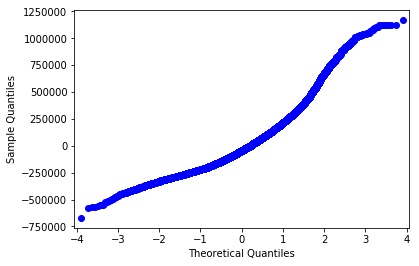

<Figure size 1080x576 with 0 Axes>

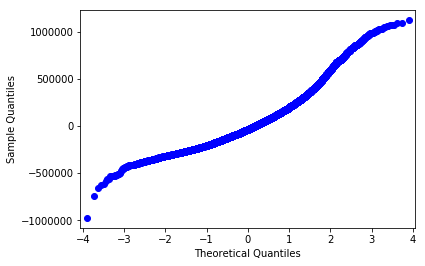

<Figure size 1080x576 with 0 Axes>

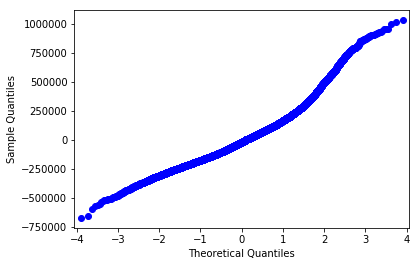

<Figure size 1080x576 with 0 Axes>

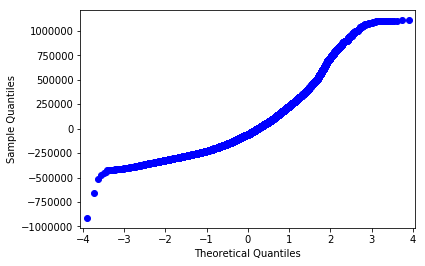

<Figure size 1080x576 with 0 Axes>

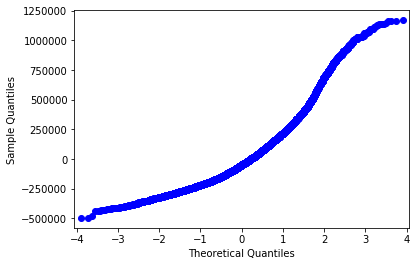

<Figure size 1080x576 with 0 Axes>

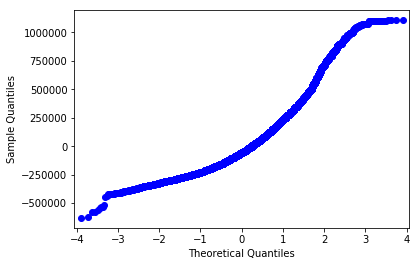

<Figure size 1080x576 with 0 Axes>

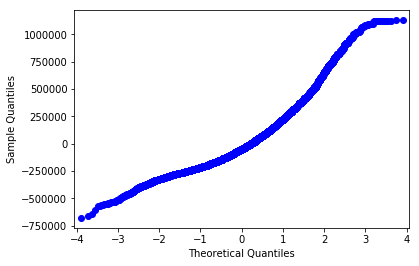

<Figure size 1080x576 with 0 Axes>

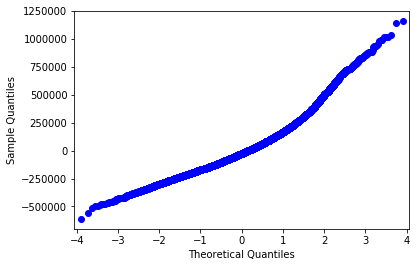

<Figure size 1080x576 with 0 Axes>

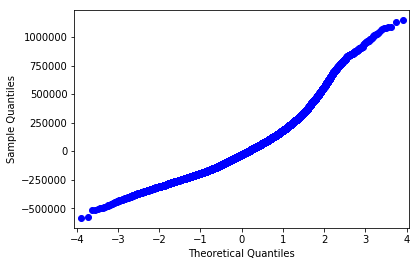

<Figure size 1080x576 with 0 Axes>

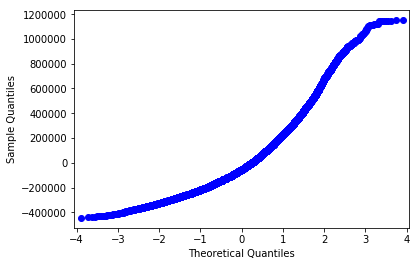

<Figure size 1080x576 with 0 Axes>

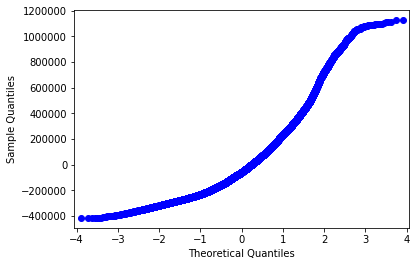

PatsyError: Error evaluating factor: NameError: name 'yr_renovated' is not defined
    price~yr_renovated
          ^^^^^^^^^^^^

In [55]:
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'age']):
    f='price~'+val
    model=ols(formula=f,data=kc_house3).fit()
    X_new=pd.DataFrame({val:[kc_house3[val].min(),kc_house3[val].max()]});
    Y_pred=model.predict(X_new)
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.qqplot(model.resid)
    plt.show()

In [ ]:
##removing the outliers for price, sqft_living, and grade normalized the distribution of their residuals#########
##the model will proceed without the outliers and it'll be noted.

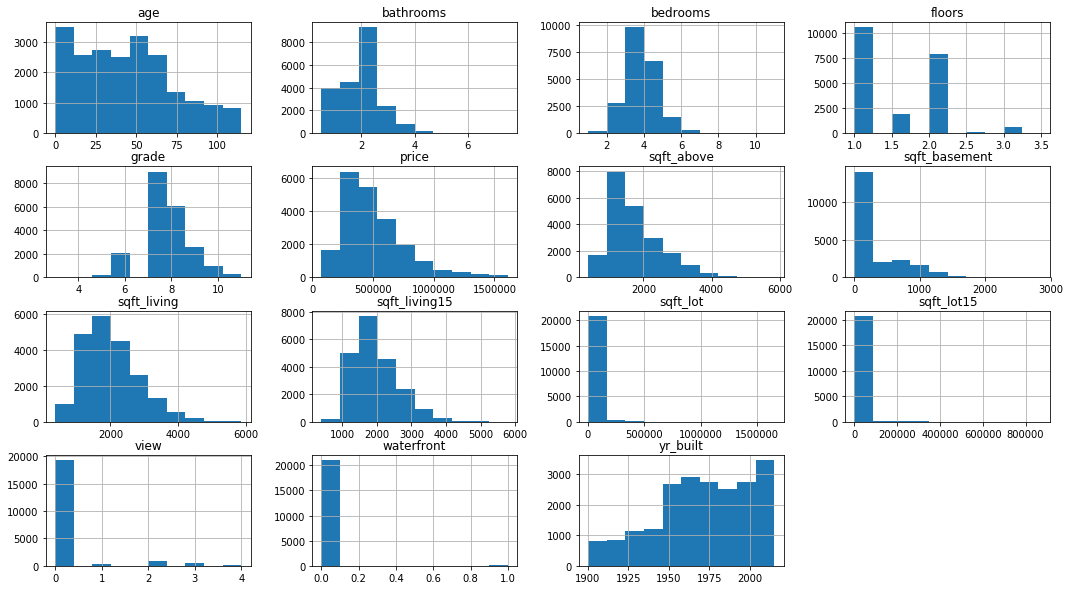

In [56]:
kc_house3.hist(figsize=(18,10) );

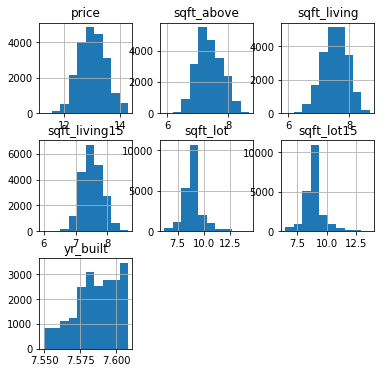

In [57]:
#Logtransform the continuous variables to improve skewness.  Transformations are conducted on continuous variables
#not categorical.  Cannot log transform 'sqft_basement' because  it has a majority of zero values
%matplotlib inline
kc_house3_log= pd.DataFrame([])
kc_house3_log['price']=np.log(kc_house3['price'])
kc_house3_log['sqft_living']=np.log(kc_house3['sqft_living'])
kc_house3_log['sqft_lot']=np.log(kc_house3['sqft_lot'])
kc_house3_log['sqft_above']=np.log(kc_house3['sqft_above'])
kc_house3_log['sqft_living15']=np.log(kc_house3['sqft_living15'])
kc_house3_log['sqft_lot15']=np.log(kc_house3['sqft_lot15'])
kc_house3_log['yr_built']=np.log(kc_house3['yr_built'])
kc_house3_log.hist(figsize  = [6, 6]);

In [58]:
kc_house3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [59]:
col_names = kc_house3.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_house3).fit()
    X_new = pd.DataFrame({val: [kc_house3[val].min(), kc_house3[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#    print(results[idx+1])
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0989633,203307,89787,0
2,bathrooms,0.236695,150032,170114,0
3,sqft_living,0.430218,90892.5,204.315,0
4,sqft_lot,0.00660804,496585,0.520127,2.61569e-32
5,floors,0.0759237,310472,130418,0
6,waterfront,0.00976793,502676,412429,5.25923e-47
7,view,0.0957696,481545,112671,0
8,grade,0.439728,-670862,154730,0
9,sqft_above,0.30754,179049,186.492,0


In [60]:
col_log_names = kc_house3_log.describe().columns.drop(['price'])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_log_names):
    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_house3_log).fit()
    X_new = pd.DataFrame({val: [kc_house3_log[val].min(), kc_house3_log[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.405359,7.35157,0.751953,0
2,sqft_lot,0.00935471,12.5487,0.0519708,4.40347e-45
3,sqft_above,0.293541,8.35133,0.632161,0
4,sqft_living15,0.329747,6.47143,0.869367,0
5,sqft_lot15,0.00700202,12.5693,0.0498191,3.85289e-34
6,yr_built,0.005735,-5.49638,2.44017,2.99953e-28


In [61]:
#Rsquared on the NON-log transformed data has a higher Rsquared.
#I'll proceed with NON-log transformed continuous data

In [62]:
#When transformed, the following appear to normally distributed:  price, sqft_above, sqft_living, yr_built. The 2
#'lot' predictors have many data points in the center of the distribution.  This will show a high level of 
#Kurtosis.

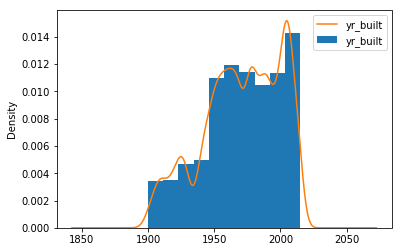

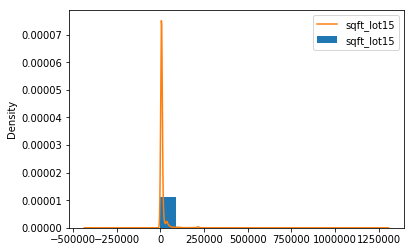

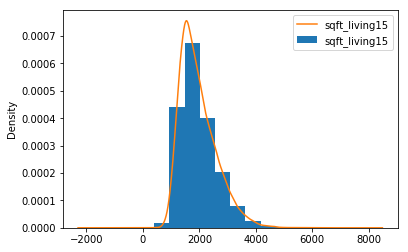

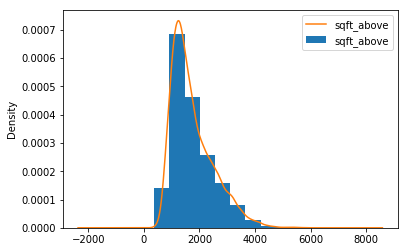

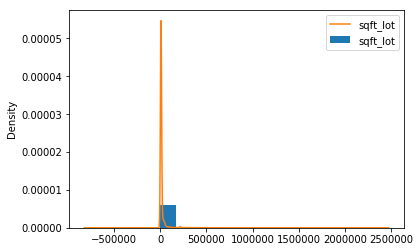

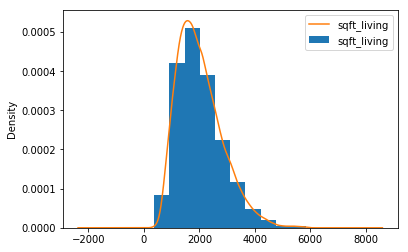

In [63]:
#Now I'll plot a histogram & KDE for each predictor.
for column in ['yr_built','sqft_lot15','sqft_living15','sqft_above','sqft_lot','sqft_living']:
    kc_house3[column].plot.hist(density=True )
    kc_house3[column].plot.kde(label=column )
    plt.legend()
    plt.show()

In [64]:
#Observations: Sqft_above, sqft_living, sqft_living15 appear to be normally distributed

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


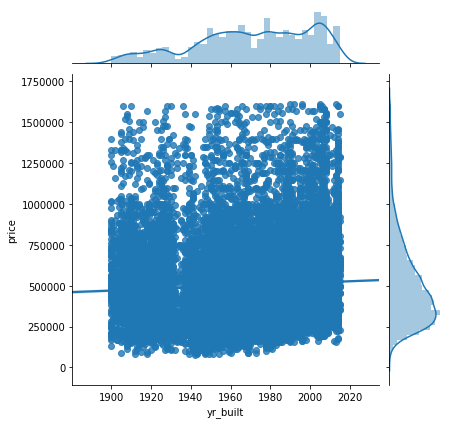

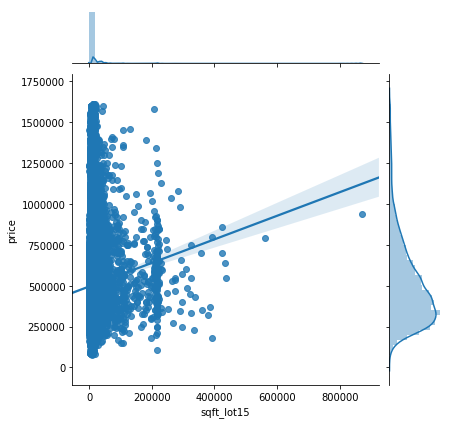

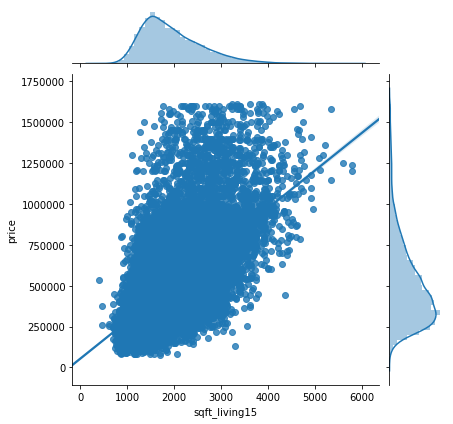

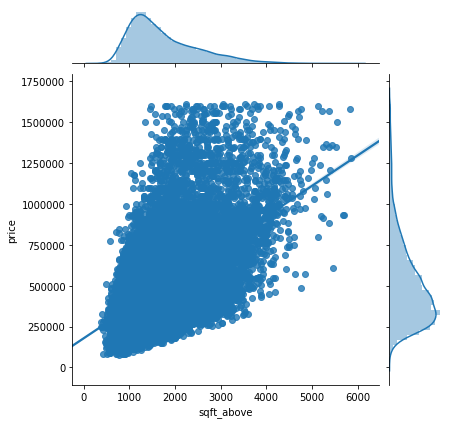

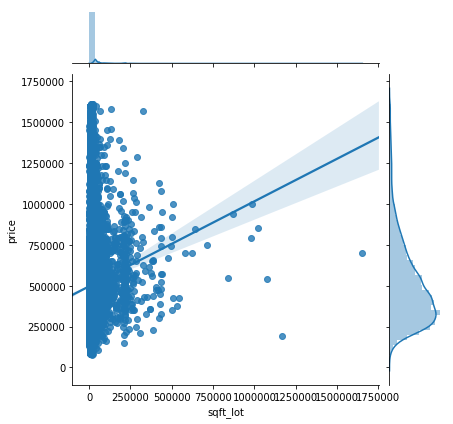

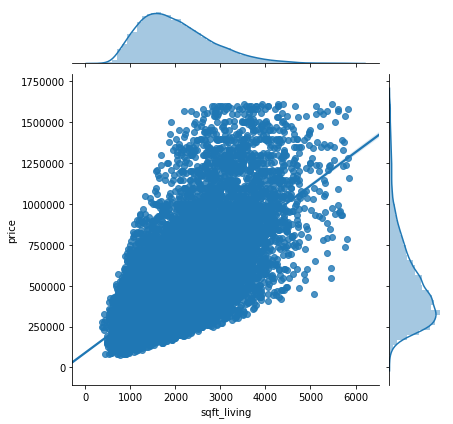

In [65]:
#Here we'll use a joint plot, which will allow us to visually inspect linearity as well as normality assumptions 
#as a single step through the use catter plots, distributions, kde and simple regression line.
for column in ['yr_built','sqft_lot15','sqft_living15','sqft_above','sqft_lot','sqft_living']:
    sns.jointplot(x=column, y='price', data=kc_house3, kind='reg')

In [66]:
# The normality assumption does not hold strong for most predictors.  Bedrooms, price, sqft_living, sqft_above, 
#sqft_living15 are normally distributed.  We'll move on with all predictors to check for multicollinearity and 
#for normality of their residuals.

In [67]:
kc_house3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
count,2.112400e+04,21124.000000,21124.000000,21124.000000,2.112400e+04,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000
mean,5.042189e+05,3.351401,2.082051,2022.981206,1.467774e+04,1.485585,0.003740,0.201240,7.594395,1743.613236,273.530345,1970.863946,1954.495408,12501.661664,44.136054
std,2.547242e+05,0.892471,0.728491,817.736667,3.981046e+04,0.538173,0.061041,0.699637,1.091661,757.462906,419.534127,29.292223,645.815277,26347.978684,29.292223
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,399.000000,651.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,0.000000,0.000000,7.000000,1180.000000,0.000000,1951.000000,1480.000000,5080.000000,19.000000
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.552500e+03,1.000000,0.000000,0.000000,7.000000,1540.000000,0.000000,1975.000000,1820.000000,7563.500000,40.000000
75%,6.250000e+05,4.000000,2.500000,2500.000000,1.045325e+04,2.000000,0.000000,0.000000,8.000000,2160.000000,530.000000,1996.000000,2320.000000,9991.000000,64.000000
max,1.610000e+06,11.000000,7.500000,5860.000000,1.651359e+06,3.500000,1.000000,4.000000,11.000000,5844.000000,2850.000000,2015.000000,5790.000000,871200.000000,115.000000


In [68]:
################################################################################################################

In [69]:
################################################################################################################

In [70]:
#HETEROSCEDASTICITY:  the scatter plots 'bathrooms', 'sqft_living', 'sqft_above' and 'sqft_living15 show 
# heteroscedasticity in raw data, but not in the residuals.

In [71]:
#NORMAL DISTRIBUTION:  The continuous predictor values, visualized in the histogram above, have properties of 
# normal distribution.  There is evidence of skewness to the right and kurtosis. 

#RESIDUALS plot line is horizontal centered on zero for all predictors:  'bedrooms', 'bathrooms', 'sqft_living',
# 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
#'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age'.

#Normality is NOT mandatory for regression if you don't want to do any hypothesis testing. OLS works fine for 
# non-normal data distributions in the context of prediction.

kc_house4=kc_house3##########################################################################################
kc_house4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,0.0,1955,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,400.0,1951,1690,7639,64
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,6,770,0.0,1933,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987,1800,7503,28


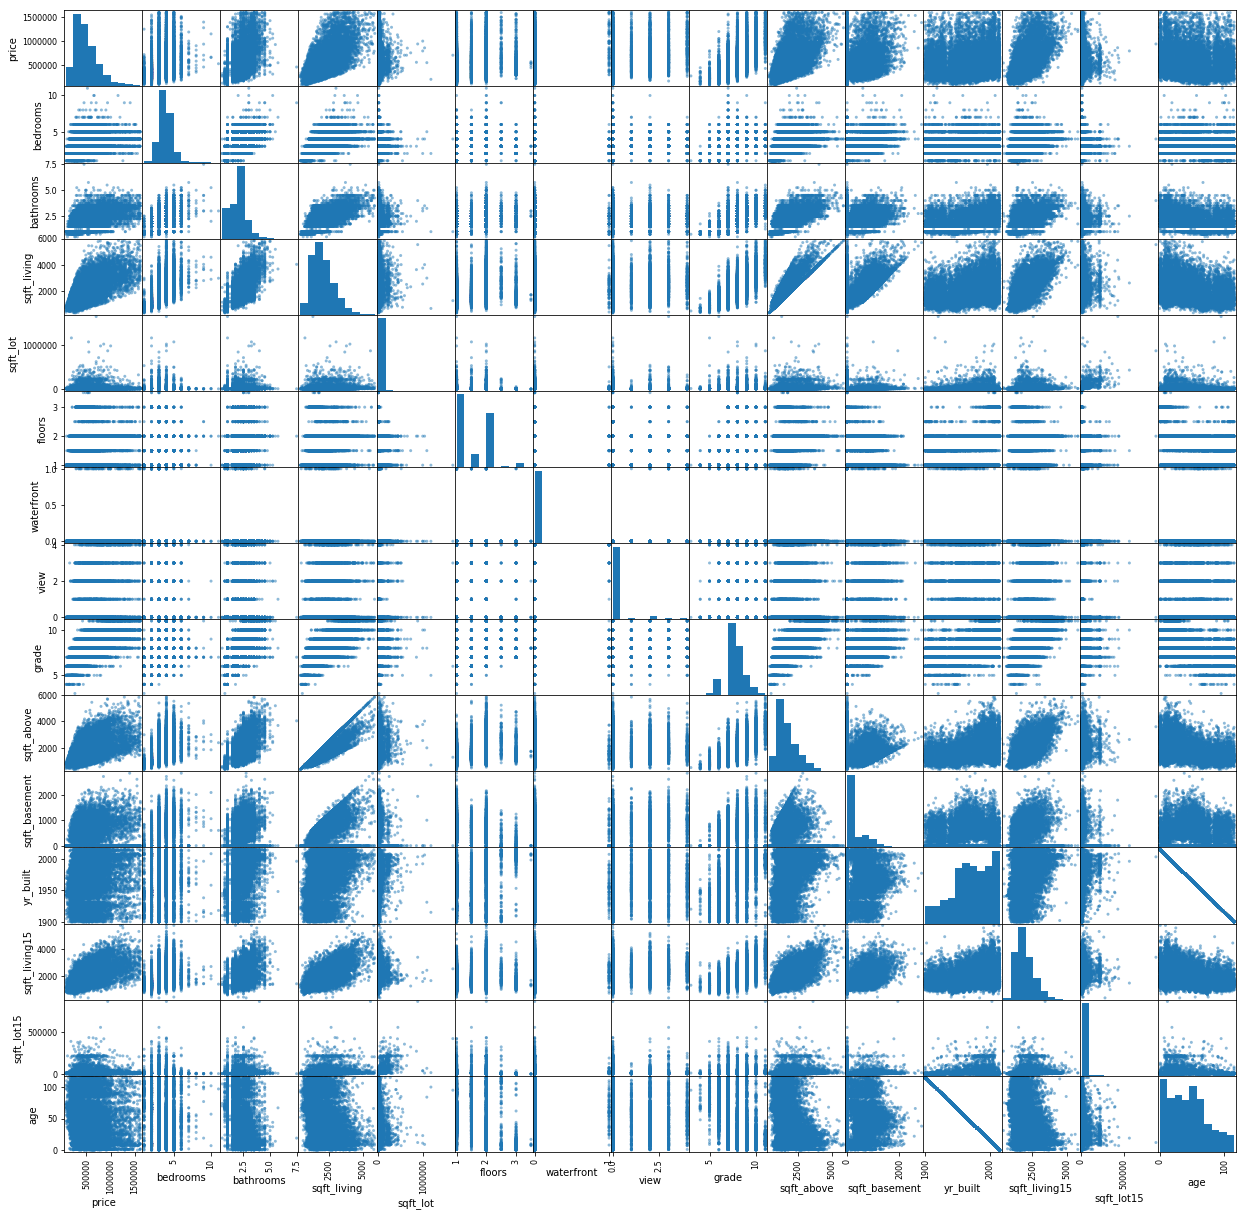

In [76]:
#MULTICOLLINEARITY ANALYSIS
pd.plotting.scatter_matrix(kc_house4, figsize=[21,21]);

In [72]:
#Correlation Matrix
kc_house4.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
price,1.000000,0.314584,0.486514,0.655910,0.081290,0.275542,0.098833,0.309467,0.663120,0.554563,0.272017,0.054590,0.584463,0.074624,-0.054590
bedrooms,0.314584,1.000000,0.514166,0.599274,0.026611,0.170372,-0.032815,0.051041,0.344895,0.482454,0.288469,0.162895,0.388784,0.024036,-0.162895
bathrooms,0.486514,0.514166,1.000000,0.730412,0.067302,0.505214,0.004011,0.126203,0.634526,0.653497,0.237595,0.528833,0.542842,0.068457,-0.528833
sqft_living,0.655910,0.599274,0.730412,1.000000,0.156961,0.349496,0.014345,0.207654,0.731804,0.859070,0.389591,0.342676,0.748040,0.170752,-0.342676
sqft_lot,0.081290,0.026611,0.067302,0.156961,1.000000,-0.016474,0.023526,0.067502,0.094850,0.164867,0.008270,0.046033,0.142442,0.710595,-0.046033
floors,0.275542,0.170372,0.505214,0.349496,-0.016474,1.000000,-0.001241,0.001481,0.458387,0.531315,-0.272767,0.498045,0.270242,-0.020411,-0.498045
waterfront,0.098833,-0.032815,0.004011,0.014345,0.023526,-0.001241,1.000000,0.307178,0.007845,-0.001762,0.029959,-0.036598,0.025237,0.031806,0.036598
view,0.309467,0.051041,0.126203,0.207654,0.067502,0.001481,0.307178,1.000000,0.179708,0.095177,0.227359,-0.066632,0.223637,0.064838,0.066632
grade,0.663120,0.344895,0.634526,0.731804,0.094850,0.458387,0.007845,0.179708,1.000000,0.726772,0.111251,0.471451,0.689268,0.104857,-0.471451
sqft_above,0.554563,0.482454,0.653497,0.859070,0.164867,0.531315,-0.001762,0.095177,0.726772,1.000000,-0.128250,0.450262,0.722245,0.178772,-0.450262


In [73]:
#Return "True" for positive or negative correlations that are bigger than 0.8.
abs(kc_house4.corr())>.8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [74]:
################################################################################################################

In [75]:
################################################################################################################

In [76]:
#Drop the following predictors because corr < 20% to price:  'yr_renovated',sqft_lot','sqft_lot15'

#Remove the multicollinear predictors from the data:  KEEP sqft_living and DROP 'sqft_above' because it is highly 
#correlated to it.

# DROP:'age' because it is negatively correlated to 'Yr_built'

kc_house5=kc_house4.drop(['sqft_above','sqft_lot','sqft_lot15','age'],axis=1)

In [77]:
kc_house4.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [78]:
kc_house5.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_basement', 'yr_built', 'sqft_living15'],
      dtype='object')

In [79]:
X = kc_house4.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house4).fit()
model.rsquared,model.rsquared_adj

(0.6221144271266745, 0.6218817169207365)

In [80]:
X = kc_house5.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house5).fit()
model.rsquared,model.rsquared_adj

(0.621452962166567, 0.6212736664540517)

In [81]:
#LOG TRANSFORMATION and SCALING: this should be considered for continuous (but not categorical) data.  So, I'm 
#transforming and scaling sqft_living with log transformed values prior to multilinear regression. Sqft_basement
#cannot be log transformed because it's values are a majority of zeros.

#***NOTE I ran the model before and after transforming and scaling the continuous datedate.  The R-squared was not
#improved by transforming data.  It was the same. So,I'm commenting out the code below and proceeding without 
#transformating nor scaling.

#sqbase=(kc_house5['sqft_basement'])
#log_sqliv=np.log(kc_house5['sqft_living'])

#scaled_log_sqliv=(log_sqliv-min(log_sqliv))/(max(log_sqliv)-min(log_sqliv))
#scaled_sqbase=(sqbase-min(sqbase))/(max(sqbase)-min(sqbase))

#trans_df=kc_house5

#kc_trans6=trans_df
#kc_trans6['sqft_basement']=scaled_sqbase
#kc_trans6['sqft_living']=scaled_log_sqliv
#kc_trans6.head()

In [82]:
#Next, we'll evaluate the model using STEPWIDE SELECTION with p-values

#In stepwise selection, we start with an empty model (which only includes the intercept), and each time, the 
#variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). 
#After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter 
#estimates which were added to the model previously, and remove them if the p-value exceeds a certain value 
#(backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [83]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [84]:
X = kc_house5.drop(['price'],axis=1)
y=pd.DataFrame(kc_house5['price'])
stepwise_selection(X, y, 
                   initial_list=[], 
                   threshold_in=0.01, 
                   threshold_out = 0.05, 
                   verbose=True)

Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  view                           with p-value 1.71063e-156
Add  floors                         with p-value 2.60814e-69
Add  sqft_living15                  with p-value 1.92998e-56
Add  bathrooms                      with p-value 8.0261e-43
Add  bedrooms                       with p-value 6.07207e-33
Add  sqft_basement                  with p-value 3.10178e-27
Add  waterfront                     with p-value 6.19126e-23


['sqft_living',
 'grade',
 'yr_built',
 'view',
 'floors',
 'sqft_living15',
 'bathrooms',
 'bedrooms',
 'sqft_basement',
 'waterfront']

In [85]:
kc_house5.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_basement', 'yr_built', 'sqft_living15'],
      dtype='object')

In [86]:
#STEPWISE SELECTION drops from kc_house5:  NONE

In [87]:
#Use Feature ranking with RECURSIVE FEATURE ELIMINATION (RFE) to analyze predictors
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
predictors=kc_house5.drop(['price'],axis=1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 9)
selector = selector.fit(predictors, kc_house5["price"])
selector.support_


array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
y = kc_house5[["price"]]
X = kc_house5.drop(["price"], axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,yr_built,sqft_living15
0,3,1.00,1180,1.0,0.0,0.0,7,0.0,1955,1340
1,3,2.25,2570,2.0,0.0,0.0,7,400.0,1951,1690
2,2,1.00,770,1.0,0.0,0.0,6,0.0,1933,2720
3,4,3.00,1960,1.0,0.0,0.0,7,910.0,1965,1360
4,3,2.00,1680,1.0,0.0,0.0,8,0.0,1987,1800


In [89]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    print(selected_columns)
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'grade'], dtype='object')
price    0.489705
dtype: float64
price    0.489463
dtype: float64
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'yr_built', 'sqft_living15'],
      dtype='object')
price    0.621453
dtype: float64
price    0.621274
dtype: float64
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'yr_built', 'sqft_living15'],
      dtype='object')
price    0.621453
dtype: float64
price    0.621274
dtype: float64
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'yr_built', 'sqft_living15'],
      dtype='object')
price    0.621453
dtype: float64
price    0.621274
dtype: float64
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'yr_built', 'sqft_living15'],
      dtype='object')


In [90]:
r_list

[price    0.621453
 dtype: float64]

In [91]:
#RFE selection for kc_house5: 'grade','view','bathrooms','bedrooms','floors','sqft_living','yr_built'
#  DROP: 'sqft_basement','waterfront','bedrooms','bathrooms','sqft_living15', and 'floors'.  When subtracted 
#from the model, they do not decrease the Rsquared nor Adj.

#  Here is the Rsquared when each was dropped, respectively:'sqft_basement'.621,''waterfront'.617. ,bedrooms'.613,
#'bathrooms'.609,'sqft_living15'.605,'floors'.601,'view'.587.

In [92]:
################################################################################################################

In [93]:
################################################################################################################

In [97]:
kc_house6=kc_house5.drop(['sqft_basement','bedrooms','waterfront','bathrooms','sqft_living15','floors'],axis=1)

In [98]:
kc_house6.columns

Index(['price', 'sqft_living', 'view', 'grade', 'yr_built'], dtype='object')

In [99]:
X = kc_house6.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house6).fit()
model.rsquared,model.rsquared_adj

(0.6011082449968463, 0.6010326937387369)

In [100]:
rsquared_=[]
rsquared_adj_=[]
mse_=[]
for i in [kc_house4,kc_house5,kc_house6]:
    X = i.drop('price', axis=1)
    pred_sum = "+".join(X.columns)
    formula = 'price~' + pred_sum
    model = ols(formula= formula, data=i).fit()
    rsquared_.append(model.rsquared)
    rsquared_adj_.append(model.rsquared_adj)
    mse_.append(model.mse_resid)
rsquared_,rsquared_adj_,mse_

([0.6221144271266745, 0.621452962166567, 0.6011082449968463],
 [0.6218817169207365, 0.6212736664540517, 0.6010326937387369],
 [24533987639.94518, 24573440645.26568, 25886764535.276836])

In [101]:
#CROSS-VALIDATION using Scikit-Learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = kc_house6.drop(['price'],axis=1)
y=pd.DataFrame(kc_house5['price'])
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results,round(np.mean(cv_10_results),1)

(array([-2.45895201e+10, -2.71132412e+10, -2.54385115e+10, -2.68755982e+10,
        -2.44315455e+10, -2.65423300e+10, -2.31169901e+10, -2.69923124e+10,
        -2.67282593e+10, -2.89546967e+10]), -26078300494.6)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
yhat_train=linreg.predict(X_train)
yhat_test=linreg.predict(X_test)
train_residuals=y_train-yhat_train
test_residuals=y_test-yhat_test
mse_train=np.sum(train_residuals**2)/len(y_train)
mse_test=np.sum(test_residuals**2)/len(y_test)
mse_train,mse_test

(price    2.611385e+10
 dtype: float64, price    2.380049e+10
 dtype: float64)

In [103]:
###############################################################################################################

In [104]:
###############################################################################################################

In [105]:
#MODEL SUMMARY##################################################################################################

In [106]:
X = kc_house6.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     7956.
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:00:23   Log-Likelihood:            -2.8322e+05
No. Observations:               21124   AIC:                         5.664e+05
Df Residuals:                   21119   BIC:                         5.665e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.597e+06    8.2e+04     56.080      0.000    4.44e+06    4.76e+06
sqft_living   107.7602      2.000     53.890      0.000     103.841     111.680
view          4.42e+04   1644.383     26.878      0.000     4.1e+04    4.74e+04
grade        1.244e+05   1593.185     78.053      0.000    1.21e+05    1.27e+05
yr_built    -2670.7060     43.527    -61.357      0.000   -2756.023   -2585.389
==============================================================================
Omnibus:                     2897.612   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7338.249
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                       5.432   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#################################################################################################################

In [108]:
#################################################################################################################

In [109]:
#################################################################################################################

In [110]:
#Price= (4,597,000) + (107.8)*sqft_living + (44,200)*viewed + (124,400)*grade + (-2670.7)*yr_built

In [111]:
#################################################################################################################

In [112]:
#################################################################################################################
#QUESTION:  yr_built is negative correlated to price, so it requires further examination.########################
yr_built_group=kc_house6.groupby(by='yr_built').mean()
yr_built_group

,price,sqft_living,view,grade
yr_built,,,,
1900,568531.244186,1715.290698,0.232558,6.837209
1901,557108.344828,1763.620690,0.068966,7.034483
1902,622546.153846,1821.153846,0.076923,7.269231
1903,480958.195652,1507.739130,0.239130,6.869565
1904,522137.477273,1464.386364,0.068182,6.795455
1905,678069.300000,1858.571429,0.242857,7.342857
1906,605597.102273,1673.920455,0.102273,7.034091
1907,622398.269841,1802.349206,0.126984,7.174603
1908,526868.892857,1641.773810,0.416667,6.904762


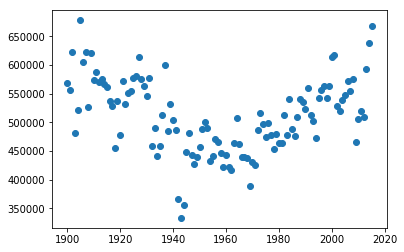

In [113]:
plt.scatter(yr_built_group.index,yr_built_group.price)

In [ ]:
#To answer the 'yr_built' question:  I grouped the homes by year and calculated their mean.  ~1960 homes reached 
# an average (mean) low.  Years before and years after this time frame were higher. It hypothesized that homes 
#>60 years old below a mean value are torn down and replaced.  This would tend to raise the overall mean value 
#for older homes as lower value, older homes are replaced with newer homes.

In [114]:
#CROSS-VALIDATION using Scikit-Learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = kc_house6.drop(['price'],axis=1)
y=pd.DataFrame(kc_house6['price'])
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results,round(np.mean(cv_10_results))

(array([-2.45895201e+10, -2.71132412e+10, -2.54385115e+10, -2.68755982e+10,
        -2.44315455e+10, -2.65423300e+10, -2.31169901e+10, -2.69923124e+10,
        -2.67282593e+10, -2.89546967e+10]), -26078300495.0)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
yhat_train=linreg.predict(X_train)
yhat_test=linreg.predict(X_test)
train_residuals=y_train-yhat_train
test_residuals=y_test-yhat_test
mse_train=np.sum(train_residuals**2)/len(y_train)
mse_test=np.sum(test_residuals**2)/len(y_test)
mse_train,mse_test,np.sqrt(mse_train)

(price    2.580788e+10
 dtype: float64, price    2.653934e+10
 dtype: float64, price    160648.30824
 dtype: float64)

In [116]:
pd.DataFrame(y_train).head()

,price
2112,264950.0
5325,285000.0
7042,328000.0
10328,661500.0
13365,810000.0


In [117]:
pd.DataFrame(train_residuals).head()

,price
2112,-97036.068344
5325,-107093.997463
7042,-195036.408838
10328,204434.626018
13365,60721.411501


In [118]:
len(y_train),len(train_residuals),len(yhat_train)

(19011, 19011, 19011)

In [119]:
df_y_train=pd.DataFrame(y_train)
df_train_residuals=round(pd.DataFrame(train_residuals))#y_train-yhat_train, so + residuals indicates predicted
#sale price is < observed
percent_below_obs=.2
threshold_value=percent_below_obs*df_y_train
test=df_train_residuals>threshold_value
result=pd.concat([df_y_train,df_train_residuals,test],axis=1,
                 join_axes=[df_y_train.index],ignore_index=True)
result=result.rename({0:'Sale_Price',1:'residuals',2:'Bad_Invest_Test'},axis='columns')
result.head()

,Sale_Price,residuals,Bad_Invest_Test
2112,264950.0,-97036.0,False
5325,285000.0,-107094.0,False
7042,328000.0,-195036.0,False
10328,661500.0,204435.0,True
13365,810000.0,60721.0,False


In [121]:
print(f'Investing in a House is consider BAD if the Predicted Sale Price is > {100-round(percent_below_obs*100)}% of the Observed Sale Price') 
print(f'Number of BAD Investments is {sum(result.Bad_Invest_Test)} of {len(y_train)}') 
print(f'Based on our assumptions, our model predicts that {round(100-(sum(result.Bad_Invest_Test)/len(y_train))*100)} % will be GOOD')


Investing in a House is consider BAD if the Predicted Sale Price is > 80% of the Observed Sale Price
Number of BAD Investments is 3701 of 19011
Based on our assumptions, our model predicts that 81 % will be GOOD


In [122]:
kc_house6.head()

,price,sqft_living,view,grade,yr_built
0,221900.0,1180,0.0,7,1955
1,538000.0,2570,0.0,7,1951
2,180000.0,770,0.0,6,1933
3,604000.0,1960,0.0,7,1965
4,510000.0,1680,0.0,8,1987


In [ ]:
###############################################################################################################

In [ ]:
###############################################################################################################

In [ ]:
#QUESTON #3:  WATERFRONT/INLAND MODEL ANALYSIS##############################################################################

In [159]:
#WATERFRONT PLOT:  Keep 'sqft_living','view', 'grade','yr_built' relatively constant near their median to analyze 
#  waterfront v. price
waterfront_df=kc_house2[(kc_house2['grade']>=7) & (kc_house2['grade']<=8) & 
        (kc_house2['yr_built']>=1951) & (kc_house2['yr_built']<=1997)&  (kc_house2['sqft_living']>=1430) & 
                (kc_house2['sqft_living']<=2550)] 

waterfront_df.shape,kc_house2.shape

((5687, 15), (21596, 15))

In [160]:
waterfront_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
count,5.687000e+03,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000,5687.000000
mean,4.272047e+05,3.457183,2.076095,1923.554247,15311.853877,1.279321,0.002462,0.139793,7.403376,1574.310181,343.464217,1973.596624,1898.862318,13558.472305,41.403376
std,1.599517e+05,0.694854,0.463589,300.717193,31349.055899,0.446396,0.049559,0.564806,0.490618,387.000945,381.885321,12.953125,375.808691,23451.109459,12.953125
min,1.470000e+05,1.000000,0.500000,1430.000000,779.000000,1.000000,0.000000,0.000000,7.000000,740.000000,0.000000,1951.000000,399.000000,794.000000,18.000000
25%,3.000000e+05,3.000000,1.750000,1670.000000,7304.000000,1.000000,0.000000,0.000000,7.000000,1260.000000,0.000000,1962.000000,1630.000000,7416.000000,31.000000
50%,4.050000e+05,3.000000,2.000000,1900.000000,8775.000000,1.000000,0.000000,0.000000,7.000000,1520.000000,120.000000,1975.000000,1870.000000,8542.000000,40.000000
75%,5.200000e+05,4.000000,2.500000,2150.000000,11405.000000,2.000000,0.000000,0.000000,8.000000,1830.000000,680.000000,1984.000000,2120.000000,10496.500000,53.000000
max,1.500000e+06,7.000000,4.000000,2550.000000,623779.000000,3.000000,1.000000,4.000000,8.000000,2550.000000,1500.000000,1997.000000,3790.000000,380279.000000,64.000000


In [161]:
waterfront_group=waterfront_df.groupby(by='waterfront').mean()
waterfront_group

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
waterfront,,,,,,,,,,,,,,
0.0,426294.417240,3.457959,2.076503,1923.335625,15280.347435,1.278865,0.130795,7.403138,1574.215054,343.326459,1973.626476,1898.244315,13536.585052,41.373524
1.0,796067.857143,3.142857,1.910714,2012.142857,28078.714286,1.464286,3.785714,7.500000,1612.857143,399.285714,1961.500000,2149.285714,22427.500000,53.500000


In [126]:
kc_house2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


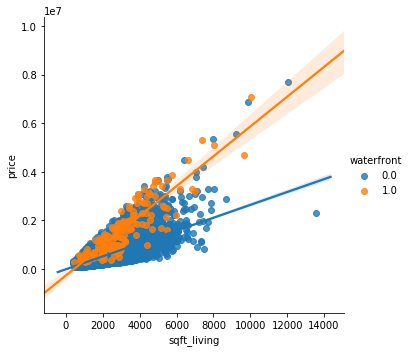

In [127]:
data=kc_house2.drop(['bedrooms', 'bathrooms', 'floors', 'view','sqft_lot','grade', 'sqft_above','sqft_basement', 
                     'yr_built', 'sqft_living15','sqft_lot15', 'age'],axis=1)
sns.lmplot(x='sqft_living', y='price',hue='waterfront', data=data)

In [128]:
waterfront_group=data.groupby(by='waterfront').mean()
waterfront_group

,price,sqft_living
waterfront,,
0.0,5.322812e+05,2072.417576
1.0,1.717215e+06,3244.753425


In [129]:
kc_inland=kc_house2[kc_house2['waterfront']==0]
kc_waterfront=kc_house2[kc_house2['waterfront']==1]
kc_inland.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,0.0,1955,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,400.0,1951,1690,7639,64
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,6,770,0.0,1933,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987,1800,7503,28


In [130]:
kc_inland2=kc_inland.drop(['waterfront','bedrooms','bathrooms','floors','sqft_basement','sqft_living15'],axis=1)
kc_waterfront2=kc_waterfront.drop(['waterfront','yr_built','view','grade','bedrooms','bathrooms','floors',
                                   'sqft_basement','sqft_living15','sqft_lot','sqft_above', 'sqft_lot15','age'],
                                  axis=1)#sqft_living, view, grade, yr_built
kc_waterfront2.head()

,price,sqft_living
49,1350000.0,2753
230,655000.0,1450
246,2400000.0,3650
264,369900.0,760
300,3080000.0,4550


In [131]:
X = kc_inland2.drop('price', axis=1)
y=pd.DataFrame(kc_house6['price'])
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_inland2).fit()
model.rsquared,model.rsquared_adj

(0.6241306579367969, 0.6240079508481651)

In [132]:
kc_waterfront2.head()

,price,sqft_living
49,1350000.0,2753
230,655000.0,1450
246,2400000.0,3650
264,369900.0,760
300,3080000.0,4550


In [133]:
X = kc_waterfront2.drop('price', axis=1)
y=kc_waterfront2.price
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_waterfront2).fit()
model.rsquared,model.rsquared_adj

(0.7838629845626286, 0.7823620330665357)

In [134]:
len(kc_waterfront2.price)

146

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
yhat_train=linreg.predict(X_train)
yhat_test=linreg.predict(X_test)
train_residuals=y_train-yhat_train
test_residuals=y_test-yhat_test
mse_train=np.sum(train_residuals**2)/len(y_train)
mse_test=np.sum(test_residuals**2)/len(y_test)
mse_train,mse_test, np.sqrt(mse_train)

(250496319644.83008, 556134496369.1918, 500496.07355585723)

In [136]:
#CROSS-VALIDATION using Scikit-Learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = kc_waterfront2.drop(['price'],axis=1)
y=pd.DataFrame(kc_waterfront2['price'])
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results,round(np.mean(cv_10_results),1)

(array([-4.16743703e+11, -2.03210654e+11, -3.01486903e+11, -4.67101285e+11,
        -1.64684963e+11, -1.95907758e+11, -3.82533758e+11, -3.16324188e+11,
        -3.14084240e+11, -1.60070602e+11]), -292214805248.6)

In [137]:
df_y_train=pd.DataFrame(y_train)
df_train_residuals=round(pd.DataFrame(train_residuals))#y_train-yhat_train, so + residuals indicates predicted
#sale price is < observed
percent_below_obs=.2
threshold_value=percent_below_obs*df_y_train
test=df_train_residuals>threshold_value
result=pd.concat([df_y_train,df_train_residuals,test],axis=1,
                 join_axes=[df_y_train.index],ignore_index=True)
result=result.rename({0:'Sale_Price',1:'residuals',2:'Bad_Invest_Test'},axis='columns')
result.head()

,Sale_Price,residuals,Bad_Invest_Test
18582,570000.0,371697.0,True
1418,1700000.0,8648.0,False
19955,988500.0,7404.0,False
3930,1380000.0,-671618.0,False
10142,985000.0,-422250.0,False


In [139]:
print(f'Investing in a House is consider BAD if the Predicted Sale Price is > {100-round(percent_below_obs*100)}% of the Observed Sale Price') 
print(f'Number of BAD Investments is {sum(result.Bad_Invest_Test)} of {len(y_train)}') 
print(f'Based on our assumptions, our model predicts that {round(100-(sum(result.Bad_Invest_Test)/len(y_train))*100)} % will be GOOD')

Investing in a House is consider BAD if the Predicted Sale Price is > 80% of the Observed Sale Price
Number of BAD Investments is 31 of 131
Based on our assumptions, our model predicts that 76 % will be GOOD


/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


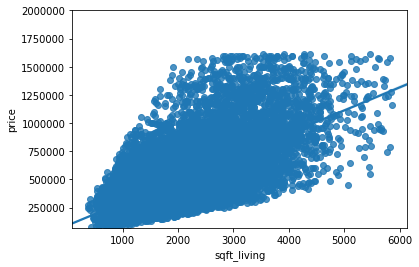

KeyError: 'waterfront'

In [141]:
for val in ['sqft_living', 'waterfront', 'view','grade','yr_built']:
    g=sns.regplot(x=val, y='price',data=kc_house6);
    g.set(ylim=(70000, 2000000));
    plt.show()


In [ ]:
################################################################################################################

In [ ]:
################################################################################################################

In [142]:
#ANALYZE individual predictors while keep the other predictors constant.  This is to identify trends.###########

In [143]:
kc_house6.describe()

,price,sqft_living,view,grade,yr_built
count,2.112400e+04,21124.000000,21124.000000,21124.000000,21124.000000
mean,5.042189e+05,2022.981206,0.201240,7.594395,1970.863946
std,2.547242e+05,817.736667,0.699637,1.091661,29.292223
min,7.800000e+04,370.000000,0.000000,3.000000,1900.000000
25%,3.200000e+05,1410.000000,0.000000,7.000000,1951.000000
50%,4.450000e+05,1890.000000,0.000000,7.000000,1975.000000
75%,6.250000e+05,2500.000000,0.000000,8.000000,1996.000000
max,1.610000e+06,5860.000000,4.000000,11.000000,2015.000000


In [144]:
#SQUARE FOOT LIVING PLOT:  Keep 'waterfront','view', 'grade','yr_built' relatively constant near their median to 
# analyze sqft_living v. price
sqftliving_df=kc_house6[(kc_house6['view']==0) &  (kc_house6['grade']>=7) & 
                      (kc_house6['grade']<=8) & (kc_house6['yr_built']>1951) & (kc_house6['yr_built']<1997) & 
                        (kc_house6['price']>322000) & (kc_house6['price']<=645000)] 

sqftliving_df.shape,kc_house6.shape

((4312, 5), (21124, 5))

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


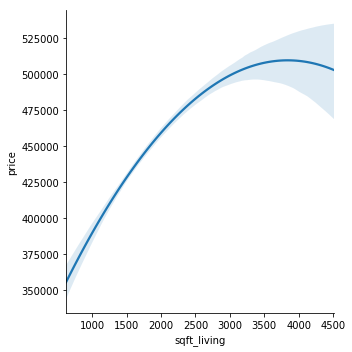

In [145]:
sns.lmplot(x='sqft_living', y='price', order=2, scatter=False,data=sqftliving_df)

In [149]:
#GRADE PLOT:  Keep 'waterfront','view', 'sqft_living','yr_built' relatively constant near their median to analyze 
#  grade v. price
grade_df=kc_house6[ (kc_house6['view']==0) &  (kc_house6['sqft_living']>=1430) & 
                (kc_house6['sqft_living']<=2550) & (kc_house6['yr_built']>=1951) & (kc_house6['yr_built']<=1997)& 
                        (kc_house6['price']>322000) & (kc_house6['price']<=645000)] 

grade_df.shape,kc_house6.shape

((3470, 5), (21124, 5))

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


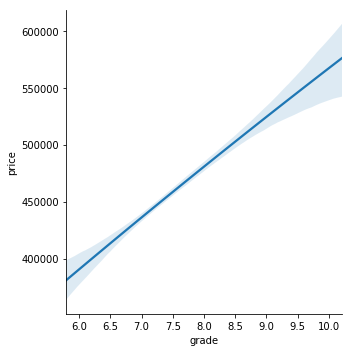

In [152]:
sns.lmplot(x='grade', y='price',  order=2,scatter=False,data=grade_df)

In [153]:
#YEAR BUILT PLOT:  Keep 'waterfront','view', 'grade','sqft_living' relatively constant near their median to 
# analyze yr_built v. price
yrbuilt_df=kc_house6[(kc_house6['view']==0) &  (kc_house6['grade']>=7) & 
                (kc_house6['grade']<=8) &  (kc_house6['sqft_living']>=1430) & (kc_house6['sqft_living']<=2550)& 
                        (kc_house6['price']>322000) & (kc_house6['price']<=645000)] 

yrbuilt_df.shape,kc_house6.shape

((5519, 5), (21124, 5))

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


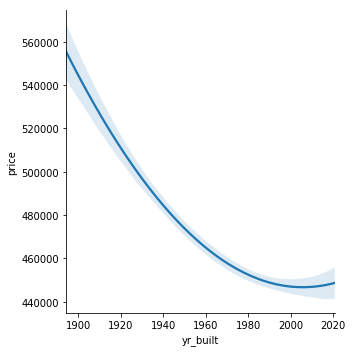

In [151]:
sns.lmplot(x='yr_built', y='price', order=2,scatter=False,data=yrbuilt_df)

In [165]:
#WATERFRONT PLOT:  Keep 'yr_built','view', 'grade','sqft_living' relatively constant near their median to 
# analyze 'waterfront' v. price

waterfront_df=kc_house2[(kc_house2['grade']<=8) & (kc_house2['grade']>=7) & 
    (kc_house6['yr_built']>=1951) & (kc_house6['yr_built']<=1997) & (kc_house2['sqft_living']>=1430) & 
    (kc_house2['sqft_living']<=2550)] 

waterfront_group=waterfront_df.groupby(by='waterfront').mean()
waterfront_group

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
waterfront,,,,,,,,,,,,,,
0.0,426294.417240,3.457959,2.076503,1923.335625,15280.347435,1.278865,0.130795,7.403138,1574.215054,343.326459,1973.626476,1898.244315,13536.585052,41.373524
1.0,796067.857143,3.142857,1.910714,2012.142857,28078.714286,1.464286,3.785714,7.500000,1612.857143,399.285714,1961.500000,2149.285714,22427.500000,53.500000


In [164]:
waterfront_df.shape

(3441, 15)

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


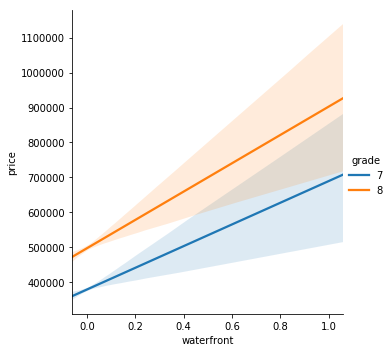

In [154]:
sns.lmplot(x='waterfront', y='price',hue='grade', scatter=False,data=waterfront_df)

In [155]:
#VIEW PLOT:  Keep 'waterfront','sqft_living', 'grade','yr_built' relatively constant near their median to analyze 
#  view v. price
view_df=kc_house6[(kc_house6['grade']>=7) & (kc_house6['grade']<=8) & 
                (kc_house6['yr_built']>=1951) & (kc_house6['yr_built']<=1997) &  (kc_house6['sqft_living']>=1430) 
                & (kc_house6['sqft_living']<=2550) & (kc_house6['price']>322000) & (kc_house6['price']<=645000)] 

view_df.shape,kc_house6.shape

((3441, 5), (21124, 5))

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


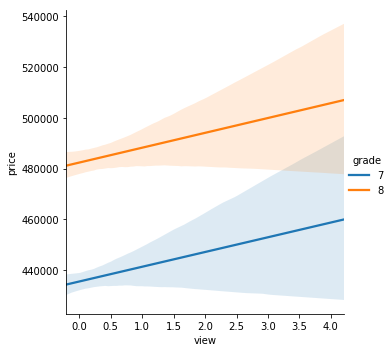

In [153]:
sns.lmplot(x='view', y='price',hue='grade', scatter=False,data=view_df)